# Miami Gastronomic Offering - Initial Business Analysis
### Applied Data Science Capstone by IBM/Coursera

<a name="TOC"></a>
## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Data Exploratory Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)




## Introduction: Business Problem <a name="introduction"></a>

The Mestiza Inc. group's Stakeholders are interested on a new restaurant development for its Latin American fusion proposals. Given last decade growth in the Miami Area specially in the gastronomic scene, stakeholders will like to conduct a full analysis divided on phases for the proposal consolidation to the partners. This Analysis will be conducted to determine the most optimal conditions such as location, nearby competitors and gastronomical proposal in the area. 

Miami Location also seems to be benefited by the global and national environment a favorable trend of top companies opening new offices in the state of Florida together with the rise in remote working is giving workers more freedom to choose where they want to live, this has lured a significant amount of people from traditionally larger cities such as New York, Los Angeles, San Francisco, Boston to live in Florida creating changing the ecosystems in many economic spaces. 
 
**“Florida's population grew by 2.7 million — or 14.6% — between 2010 and 2020, according to US Census data. This is double the rate of overall US population growth.” - Business Insider** 

**"It's not just retirees – it's tech workers leaving San Francisco," John Boyd, the CEO of The Boyd Company 
In particular, Florida is becoming a hotspot for banking and financial services, while Miami is as emerging as "one of the hottest new tech hubs in North America today,"** 

Hedge fund Elliott Management is moving its headquarters to West Palm Beach, private-equity firm Blackstone plans to open an office in Miami, and Goldman Sachs is considering the state for its asset management division. Even Subway is shifting some business units to Miami. 
 
In the gastronomic scene, over the decades, Miami has become a melting pot of Latin and Caribbean culture including Central and South America. this mix of cultures, is especially popular in Miami and you can indulge in fresh, citrusy ceviche at casual corners and upscale restaurants all over Miami. At Miami’s glamorous hotel restaurants, guests can take the elevator down to dine in a restaurant with a lavish design and buzzy ambiance that’s just as much a part of the experience as the menu. Miami has become one of the hottest gastronomic hubs in North America, given the diversity of its residents that attracts the world with its many amenities such a beautiful coast line, yearlong summer weather and relative closeness to amusement parks and natural adventures. all of these as a complementary part to the state laws and policies supporting investment, and business to move combined with a favorable law to workers with no Income Tax making it attractive as a home base.

The main objective of this report is to show the diversity of the Miami scene and the hottest points to determine the best possible location for a new restaurant, and set the starting point for the proposal and any additional analysis required to complete a full business assessment.


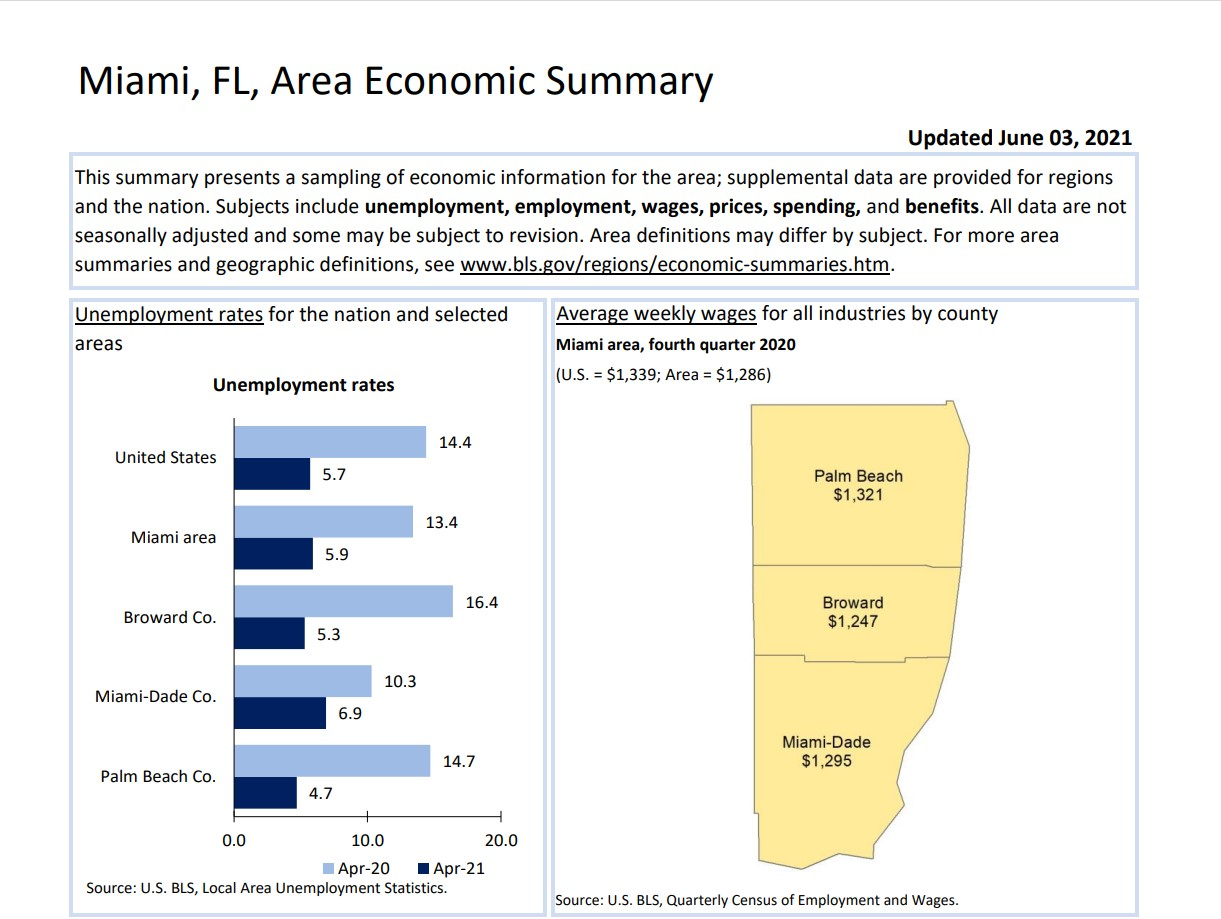


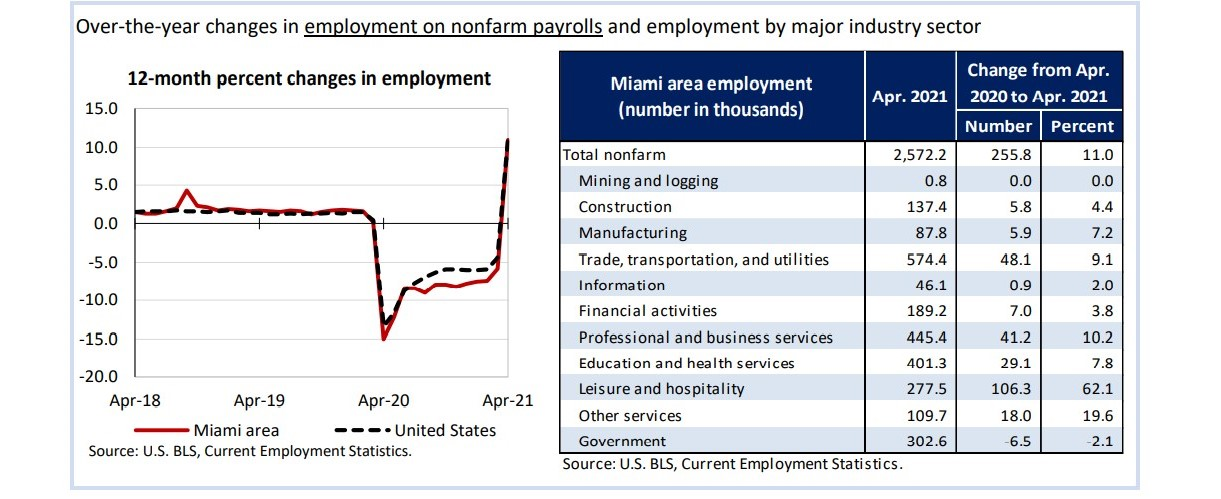


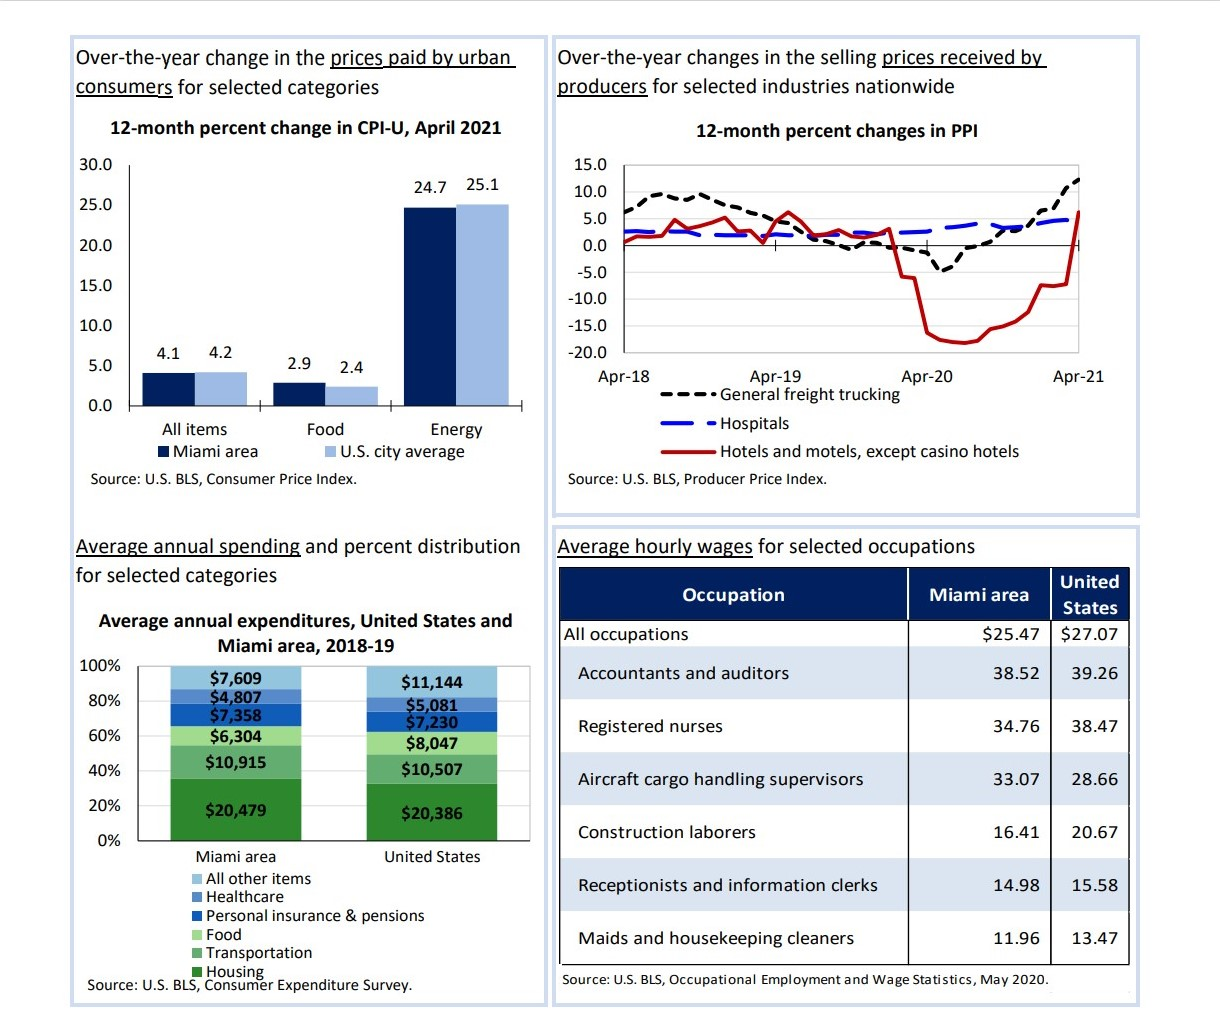


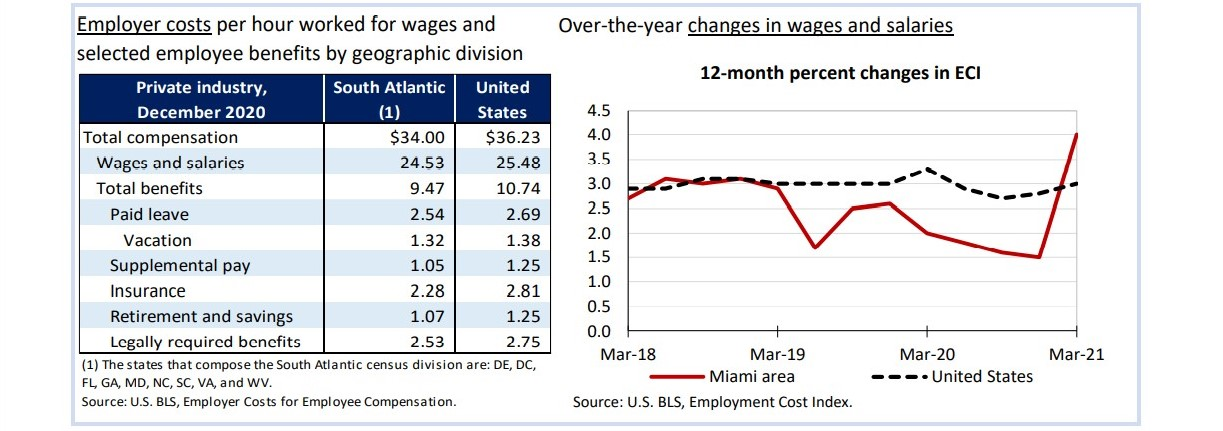

#### Source:

**US Bureau of Labor Statistics** [Miami Area Economic Summary](https://www.bls.gov/regions/southeast/summary/blssummary_miami.pdf)

##### Additional References: 
[Average Weekly Wages](https://www.bls.gov/cew/)\
[Annual Spending](https://www.bls.gov/cex/)\
[Employer Cost](https://www.bls.gov/ncs/ect/)

## Data description <a name="data"></a>

The follow section contain the initial data sets to be used during this project to provide descriptive analysis on different variables for the Miami-Dade Area as a possible location for the development of a new Restaurant by Mestiza Inc. Group, each section gives an example of each dataframe and its variables. Also the sources and the process of Data Cleaning and Wrangling is represented for ilustrative purposes.

<a name="Data"></a>
### Data Sections
* [Miami Neighborhoods](#Miami)
* [Demographic Data](#Demographic)\
[Latino Population Demography](#Latino)\
[Miami Income Data](#Income)\
[Population Age Demography by Race](#Population)\
[Place of Origin Demography](#Origin)     
* [Graphic Geographical Data](#Geographical)
* [Venue Data](#Venue)
* [return main](#TOC)

In [1]:
# library for data analysis
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
!pip install bs4
from bs4 import BeautifulSoup

### Miami Neighborhoods & Communities <a name="Miami"></a>
[return to data menu](#Data)

The data used in this section has been extracted from Wikipedia based on latest Census Data. For this assessment we will approach Miami-Dade area reviewing Neighborhood distribution and Community distribution the later more popular among locals and also valid for the study as will represent Towns and Cities with their coordinates

In [2]:
url="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami"
dataframe_list = pd.read_html(url, flavor='bs4')
len(dataframe_list)

3

In [3]:
Miami_hoods=dataframe_list[0]
Miami_hoods.head()

Neighborhood      Demonym Population2010 Population/Km²  \
0                     Allapattah          NaN          54289           4401   
1  Arts & Entertainment District          NaN          11033           7948   
2                       Brickell  Brickellite          31759          14541   
3                    Buena Vista          NaN           9058           3540   
4                  Coconut Grove      Grovite          20076           3091   

                                   Sub-neighborhoods  \
0                                                NaN   
1                                                NaN   
2                                      West Brickell   
3  Buena Vista East Historic District and Design ...   
4  Center Grove, Northeast Coconut Grove, Southwe...   

                                         Coordinates  
0  .mw-parser-output .geo-default,.mw-parser-outp...  
1        25°47′56″N 80°11′24″W﻿ / ﻿25.799°N 80.190°W  
2        25°45′29″N 80°11′35″W﻿ / ﻿25.758°N 80.193°W  
3        25°48′47″N 80°11′31″W﻿ / ﻿25.813°N 80.192°W  
4        25°42′43″N 80°15′25″W﻿ / ﻿25.712°N 80.257°W

#### Neighborhood Dataset preparation

In [4]:
Miami_hoods=Miami_hoods.drop(['Demonym','Population2010'], axis=1)
Miami_hoods.drop(Miami_hoods.columns[1], axis=1, inplace=True)
Miami_hoods.head()

Neighborhood  \
0                     Allapattah   
1  Arts & Entertainment District   
2                       Brickell   
3                    Buena Vista   
4                  Coconut Grove   

                                   Sub-neighborhoods  \
0                                                NaN   
1                                                NaN   
2                                      West Brickell   
3  Buena Vista East Historic District and Design ...   
4  Center Grove, Northeast Coconut Grove, Southwe...   

                                         Coordinates  
0  .mw-parser-output .geo-default,.mw-parser-outp...  
1        25°47′56″N 80°11′24″W﻿ / ﻿25.799°N 80.190°W  
2        25°45′29″N 80°11′35″W﻿ / ﻿25.758°N 80.193°W  
3        25°48′47″N 80°11′31″W﻿ / ﻿25.813°N 80.192°W  
4        25°42′43″N 80°15′25″W﻿ / ﻿25.712°N 80.257°W

In [5]:
Miami_hoods.reset_index(drop=True, inplace=True)

In [6]:
Miami_hoods.dropna(subset=["Coordinates"], axis=0, inplace=True)
Miami_hoods.reset_index(drop=True, inplace=True)


In [7]:
### Replace Nan Values in Sub-Neighborhood
Miami_hoods['Sub-neighborhoods'].fillna(value=Miami_hoods['Neighborhood'],axis=0, inplace=True)
### Replace missing value in coordinates for Allapattah Neighborhood
Miami_hoods.loc[0,'Coordinates']='25°47′56″N 80°11′24″W  / 25.815°N 80.224°W'
### Formating Coordinates to Latitude and Longitude
Miami_hoods['Coordinates'].replace(' ', '')
coordinates=Miami_hoods['Coordinates'].str.split('/', expand=True, n=1 )
Miami_hoods['coordinates2']=coordinates[0]
Miami_hoods['latlong']=coordinates[1]
Miami_hoods.drop(columns=['Coordinates','coordinates2'], inplace=True)
CO=Miami_hoods['latlong'].str.split(' ', expand=True )
Miami_hoods['Latitude']=CO[1]
Miami_hoods['Longitude']=CO[2]
Miami_hoods['Latitude']=Miami_hoods['Latitude'].apply(lambda x:x.strip())
Miami_hoods['Longitude']=Miami_hoods['Longitude'].apply(lambda x:x.strip())
Miami_hoods=Miami_hoods.drop(['latlong'], axis=1)
### Fixing data Types and correcting mistakes on the data
Miami_hoods['Latitude']=Miami_hoods['Latitude'].str.replace('°N','')
Miami_hoods['Longitude']=Miami_hoods['Longitude'].str.replace('°W','')
Miami_hoods['Latitude']=Miami_hoods['Latitude'].str.strip()
Miami_hoods['Longitude']=Miami_hoods['Longitude'].str.strip()
Miami_hoods['Longitude']=Miami_hoods['Longitude'].astype('float')
Miami_hoods['Latitude']=[25.815,25.799,25.758,25.813,25.712,25.750,25.813,25.774,25.802,25.762,25.792,25.832,25.824,25.773,25.777,25.807,25.787,25.785,25.756,25.830,25.791,25.736,25.775,25.804]
Miami_hoods['Latitude']=Miami_hoods['Latitude'].astype(float)
Miami_hoods['Longitude']=Miami_hoods['Longitude']*[-1]
Miami_hoods


Neighborhood  \
0                      Allapattah   
1   Arts & Entertainment District   
2                        Brickell   
3                     Buena Vista   
4                   Coconut Grove   
5                       Coral Way   
6                 Design District   
7                        Downtown   
8                       Edgewater   
9                         Flagami   
10              Grapeland Heights   
11                   Liberty City   
12                   Little Haiti   
13                  Little Havana   
14                    Lummus Park   
15                        Midtown   
16                       Overtown   
17                      Park West   
18                      The Roads   
19                 Upper Eastside   
20               Venetian Islands   
21                   Virginia Key   
22                   West Flagler   
23                        Wynwood   

                                    Sub-neighborhoods  Latitude  Longitude  
0                                          Allapattah    25.815    -80.224  
1                       Arts & Entertainment District    25.799    -80.190  
2                                       West Brickell    25.758    -80.193  
3   Buena Vista East Historic District and Design ...    25.813    -80.192  
4   Center Grove, Northeast Coconut Grove, Southwe...    25.712    -80.257  
5   Coral Gate, Golden Pines, Shenandoah, Historic...    25.750    -80.283  
6                                     Design District    25.813    -80.193  
7   Brickell, Central Business District (CBD), Dow...    25.774    -80.193  
8                                           Edgewater    25.802    -80.190  
9            Alameda, Grapeland Heights, and Fairlawn    25.762    -80.316  
10                                  Grapeland Heights    25.792    -80.258  
11                                       Liberty City    25.832    -80.225  
12                      Lemon City (aka Little River)    25.824    -80.191  
13  Riverside and South River Drive Historic District    25.773    -80.215  
14                                        Lummus Park    25.777    -80.201  
15                              Edgewater and Wynwood    25.807    -80.193  
16                                      Spring Garden    25.787    -80.201  
17                                          Park West    25.785    -80.193  
18                                          The Roads    25.756    -80.207  
19  Bay Point Estates, Bayside District, Belle Mea...    25.830    -80.183  
20               Biscayne Island and San Marco Island    25.791    -80.161  
21                                       Virginia Key    25.736    -80.155  
22                                       West Flagler    25.775    -80.243  
23  Wynwood Art District and Wynwood Fashion District    25.804    -80.199

In [8]:
print('The dataframe has {} neighborhoods.'.format(Miami_hoods.shape[0]))

The dataframe has 24 neighborhoods.


In [9]:
url="https://en.wikipedia.org/wiki/List_of_communities_in_Miami-Dade_County,_Florida"
dataframe_list = pd.read_html(url, flavor='bs4')
len(dataframe_list)

4

In [10]:
miami=dataframe_list[0]
miami.head()

# Incorporated Community Designation Date incorporated  2010 Population
0   2               Aventura        City  November 7, 1995            35762
1   7            Bal Harbour     Village     June 16, 1947             2513
2   8     Bay Harbor Islands        Town        April 1947             5628
3  11          Biscayne Park     Village              1933             3055
4  28           Coral Gables        City              1925            46780

In [11]:
miami=miami.drop(['Designation','Date incorporated','2010 Population', '#'], axis=1)
miami.rename(columns={'Incorporated Community': 'Community'}, inplace=True)
miami.head()

Community
0            Aventura
1         Bal Harbour
2  Bay Harbor Islands
3       Biscayne Park
4        Coral Gables

Install & Import required packages to populate Latitude and Longitude of Communities

In [12]:
!pip install geopy
!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder

Solving environment: done

# All requested packages already installed.



In [13]:
### Use Geocoder API to gather Coordinates for Each Community in Miami-Dade Table 
latitude=[]
longitude=[]
for code in miami['Community']:
    g = geocoder.arcgis('{}, Miami, Florida'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Miami, Florida'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

Aventura [25.95700997431863, -80.14699993661931]
Bal Harbour [25.89685799195145, -80.12438328611387]
Bay Harbor Islands [25.891075043888335, -80.13189989613923]
Biscayne Park [25.881260000000054, -80.17998999999998]
Coral Gables [25.728414454021163, -80.25151966880864]
Cutler Bay [25.589333000000067, -80.36198399999995]
Doral [25.80999962343031, -80.33730333172564]
El Portal [25.85450000000003, -80.20560999999998]
Florida City [25.447870000000023, -80.48089999999996]
Golden Beach [25.966060000000027, -80.11957999999998]
Hialeah [25.826207000000068, -80.25694199999998]
Hialeah Gardens [25.811815669473667, -80.3863559555608]
Homestead [25.600514895540858, -80.3548120353892]
Indian Creek [25.87357505585902, -80.14016414753287]
Key Biscayne [25.679220000000043, -80.15769999999998]
Medley [25.782640038888275, -80.38599431587694]
Miami [25.77481000000006, -80.19772999999998]
Miami Beach [25.830790000000036, -80.12172999999996]
Miami Gardens [25.941570540380578, -80.1846853186584]
Miami Lakes

In [14]:
miami['Latitude']=latitude
miami['Longitude']=longitude
miami.head()

Community   Latitude  Longitude
0            Aventura  25.957010 -80.147000
1         Bal Harbour  25.896858 -80.124383
2  Bay Harbor Islands  25.891075 -80.131900
3       Biscayne Park  25.881260 -80.179990
4        Coral Gables  25.728414 -80.251520

### Demographic Data <a name="Demographic"></a>
##### Source: Survey/Program: American Community Survey
TableID: S0201
Product:
2019: ACS 1-Year Estimates Selected Population Profiles

[return to data menu](#Data)

Data are based on a sample and are subject to sampling variability. The degree of uncertainty for an estimate arising from sampling variability is represented through the use of a margin of error. The value shown here is the 90 percent margin of error. The margin of error can be interpreted roughly as providing a 90 percent probability that the interval defined by the estimate minus the margin of error and the estimate plus the margin of error (the lower and upper confidence bounds) contains the true value. In addition to sampling variability, the ACS estimates are subject to nonsampling error (for a discussion of nonsampling variability, see ACS Technical Documentation). The effect of nonsampling error is not represented in these tables.

The information presented on the tables below have been extracted from the original reports and been formatted for the subject of interest focused only on the Miami-Dade Area.

### Latino Population Demography <a name="Latino"></a>
[return to data menu](#Data)

In [15]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e2934a8bc0b54f3f8f2793a91fca2dea = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_e2934a8bc0b54f3f8f2793a91fca2dea = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_e2934a8bc0b54f3f8f2793a91fca2dea = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='deNJlZZpqCoOAvy9_YDap6b73gA_TH07CbbSL5O82ck1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e2934a8bc0b54f3f8f2793a91fca2dea)

body = client_e2934a8bc0b54f3f8f2793a91fca2dea.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-mvd316gtwy2iy4',Key='Latino Population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.set_index(['Label'], inplace=True)
df_1.head()


Hispanic Any Race  Puerto Rican   Cuban  Other Hispanic  \
Label                                                                        
Total population             1886364         98436  986926          113991   
18 to 34 years                402966         23195  183044           30815   
35 to 64 years                804772         40299  420769           42547   
65 years and over             318020         12146  220760            8087   

                   Dominican  Central American  Honduran  Nicaraguan  \
Label                                                                  
Total population       70052             75620     71787      116948   
18 to 34 years         16862             20388     19405       24880   
35 to 64 years         28236             27352     27290       57517   
65 years and over      11107              7584      5191       10534   

                   Other South American  Colombian  Venezuelan  
Label                                                           
Total population                 107875     139104      105625  
18 to 34 years                    22236      33429       28712  
35 to 64 years                    51425      63911       45426  
65 years and over                 17072      19310        6229

Table Extracted from General Census Table S0201 Product: 2019: ACS 1-Year Estimates Selected Population Profiles. taking the full estimate and disregarding for our purpose the 10% variability on the available Census estimations.

All Data has been pre-Processed to remove additional fields, Column names and other changes to make the data suitable and exportable to a CSV File. 'Total population' Numbers reflect full extent of Latino population, for this report we have exclude population details belonging to Age Range under 18 years old as won't represent a target for the Restaurant project.

Other Hispanic Field, Central American and Other South American fields have been modified to exclude countries already represented. Total Population difference with sum of individual Values account for population under 18 years Old and Mexican Populatio not segregate on the Original data.

### Miami Income Data <a name="Income"></a>
[return to data menu](#Data)

In [16]:
body = client_e2934a8bc0b54f3f8f2793a91fca2dea.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-mvd316gtwy2iy4',Key='Income.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_2 = pd.read_csv(body)
df_2.head()


Income Range USD  Household income  Family Income  Married no Kids  \
0  Less than 10,000               9.0            4.9              2.4   
1  10,000 to 14,999               5.4            3.8              2.7   
2  15,000 to 24,999              11.1           10.4              7.5   
3  25,000 to 34,999              10.4           10.9              8.7   
4  35,000 to 49,999              12.9           13.8             12.4   

   Singles or non Family household  
0                             19.3  
1                              9.7  
2                             14.3  
3                             10.6  
4                             11.3

Table Extracted from General Census Table S0201 Product: 2019: ACS 1-Year Estimates Selected Population Profiles. Considering full Miami-Dade population and disregarding race breakdown to ease the analysis and graphical representation, estimatiton considered disregarding the 10% variability on the available Census estimations.

All Data has been pre-Processed to make the data suitable and exportable to a CSV File with no significant changes to columns. 'Total population' Numbers reflect full extent of Latino population

### Population Age Demography by Race <a name="Population"></a>
[return to data menu](#Data)

In [17]:

body = client_e2934a8bc0b54f3f8f2793a91fca2dea.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-mvd316gtwy2iy4',Key='Race Demographics.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_3 = pd.read_csv(body)
df_3.head()


Label  Total Population  Other Races   Latino  White American  \
0         population           2716940       106731  1886364          347010   
1     18 to 34 years            608544        26007   402966           78772   
2     35 to 64 years           1106670        42212   804772          124957   
3  65 years and over            452047        10772   318020           68626   

   Black American  
0          416126  
1          107473  
2          151676  
3           57126

Table Extracted from General Census Table S0201 Product: 2019: ACS 1-Year Estimates Selected Population Profiles. taking the full estimate and disregarding for our purpose the 10% variability on the available Census estimations.

All Data has been pre-Processed to remove additional fields, Column names and other changes to make the data suitable and exportable to a CSV File. 'Total population' Numbers reflect full extent of general Miami-Dade population, for this report we have again excluded population details belonging to Age Range under 18 years old as won't represent a target for the Restaurant project.

### Place of Origin Demography <a name="Origin"></a>
[return to data menu](#Data)

In [18]:

body = client_e2934a8bc0b54f3f8f2793a91fca2dea.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-mvd316gtwy2iy4',Key='Origin.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_4 = pd.read_csv(body)
df_4.head()


WORLD REGION OF BIRTH OF FOREIGN BORN Total population  \
0  Foreign-born population excluding population b...          1483944   
1                                             Europe             3.3%   
2                                               Asia             2.5%   
3                                             Africa             0.7%   
4                                            Oceania             0.0%   

  Other race alone Hispanic or Latino  White Black or African American  
0            63816            1249405  75320                    120845  
1             0.0%               1.0%  44.6%                      1.0%  
2             0.0%               1.0%  14.1%                      5.0%  
3             0.0%               1.0%   3.4%                      4.2%  
4             0.0%               0.0%   6.0%                      0.0%

Table Extracted from General Census Table S0201 Product: 2019: ACS 1-Year Estimates Selected Population Profiles. taking the full estimate and disregarding for our purpose the 10% variability on the available Census estimations.

All Data has been pre-Processed to make the data suitable and exportable to a CSV File. No Major Chances to Data have been performed to the available information

### Graphic Geographical Data <a name="Geographical"></a>
[return to data menu](#Data)


#### Sources:

##### [Miami Neighborhoods](https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami)  
*This is a data frame previously defined on the report as support for coordinates of neighborhoods with the same source of neighborhoods in Miami in Miami-Dade County, Florida, United States. Many of the city's neighborhoods have been renamed, redefined and changed since the city's founding in 1896. As such, the exact extents of some neighborhoods can differ from person to person. The following is the list of all the city's major neighborhoods, including any corresponding sub-neighborhoods within them.*
##### [Geocoder](https://geocoder.readthedocs.io/) 
*Geocoder API Geocoder is a simple and consistent geocoding library written in Python. Dealing with multiple different geocoding provider such as Google, Bing*

this data will clarify the different neighborhoods in the Miami Dade area and serve for graphic maps demonstration further analysis in this report in combination with additional variables.

Download necessary packages

In [19]:
#### import Modules for Map depictions and data presentation
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [20]:
# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import folium # map rendering library
from geopy.geocoders import Nominatim

# use the inline backend to generate the plots within the browser
%matplotlib inline 

mpl.style.use('ggplot') # optional: for ggplot-like style

### Miami Area Maps <a name="Miami Area Map"></a>

##### We Define the Coordinates for Miami Area

In [21]:
address = 'Miami, FL'

geolocator = Nominatim(user_agent="Miami_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami are 25.7741728, -80.19362.


#### Miami Neighborhoods Map

For Ilustrative purpose report will use graphical depictions of Miami-Dade Area to locate Official Neighborhoods and Communities. This data would be crossed with the Venue information explain ahead in this report

In [22]:
# create map of Miami Area using latitude and longitude values
map_mia = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Neighborhood in zip(Miami_hoods['Latitude'], Miami_hoods['Longitude'], Miami_hoods['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mia)  
    
map_mia

#### Miami Communities Map

In [23]:
# create map of Miami-dade Communities Area using latitude and longitude values
map_mia = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Community in zip(miami['Latitude'], miami['Longitude'], miami['Community']):
    label = '{}'.format(Community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mia)

map_mia

## Venue Data <a name="Venue"></a>
[return to data menu](#Data)

##### Source:
##### [Foursquare venue information](https://developer.foursquare.com/)
*this information will provide a view of the different restaurant offerings and will support our analysis on possible locations for further analysis and similar offerings to the one proposed by the Stakeholders. Foursquare provides access to global POI data and rich content from over 100K trusted sources and driven by millions of consumers. Connect to our API to search, discover and rank venues and get real-time data access.*

In [24]:
CLIENT_ID = 'XOWRBRMUUP5YS1RKR0VHUJWCDTDRZ1NOCBCBPKTB20JO2H3V' # your Foursquare ID
CLIENT_SECRET = '22BQEDAKYLZ1B5PHKFUJGWBUK4Q3SRCFBGQCRPIOP4ZLPAW3' # your Foursquare Secret
ACCESS_TOKEN = 'HLN1P3EEBYTDZ2A4PMFKX3MPO1KCRRENTBJBKFKPPE20T0KZ' # your FourSquare Access Token
VERSION = '20210625' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XOWRBRMUUP5YS1RKR0VHUJWCDTDRZ1NOCBCBPKTB20JO2H3V
CLIENT_SECRET:22BQEDAKYLZ1B5PHKFUJGWBUK4Q3SRCFBGQCRPIOP4ZLPAW3


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    mia_rest = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    mia_rest.columns = ['Community', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(mia_rest)

In [26]:
### Create Dataframe with joint information from Geographical and General Venue Information
miami_venues = getNearbyVenues(names=miami['Community'],
                                   latitudes=miami['Latitude'],
                                   longitudes=miami['Longitude']
                                  )

Aventura
Bal Harbour
Bay Harbor Islands
Biscayne Park
Coral Gables
Cutler Bay
Doral
El Portal
Florida City
Golden Beach
Hialeah
Hialeah Gardens
Homestead
Indian Creek
Key Biscayne
Medley
Miami
Miami Beach
Miami Gardens
Miami Lakes
Miami Shores
Miami Springs
North Bay Village
North Miami
North Miami Beach
Opa-locka
Palmetto Bay
Pinecrest
South Miami
Sunny Isles Beach
Surfside
Sweetwater
Virginia Gardens
West Miami


In [27]:
miami_venues.head()

Community  Community Latitude  Community Longitude  \
0  Aventura            25.95701              -80.147   
1  Aventura            25.95701              -80.147   
2  Aventura            25.95701              -80.147   
3  Aventura            25.95701              -80.147   
4  Aventura            25.95701              -80.147   

                               Venue  Venue Latitude  Venue Longitude  \
0                          Nordstrom       25.957253       -80.145240   
1                      Aventura Mall       25.956054       -80.146718   
2  Turnberry Isle Resort & Golf Club       25.959627       -80.137067   
3                Mystic Pointe Tower       25.953201       -80.127895   
4                          Houston's       25.936259       -80.148407   

                             Venue Category  
0                             Women's Store  
1                             Shopping Mall  
2                               Golf Course  
3  Residential Building (Apartment / Condo)  
4                       American Restaurant

In [28]:
print(miami_venues.shape)


(3400, 7)


In [29]:
print('There are {} uniques categories related to Food. and {} unique Venues'.format(len(miami_venues['Venue Category'].unique()),len(miami_venues['Venue'].unique())))

There are 118 uniques categories related to Food. and 274 unique Venues


## Methodology <a name="methodology"></a>
[return to main](#TOC)

The project will follow as a guideline methodology the CRISP-DM which stands for Cross-Industry Standard Process for Data Mining, following 6 Steps to cover the problem presented for a Data Science approach.


![CRISP](https://www.ibm.com/docs/en/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg)

**1. Business Understanding:** Covered by the initial problem statement, will be taken as an iterative approach as stakeholders prepare the proposal and concept to be deployed. Mestiza Group mission present as “To provide memorable gastronomic experiences with a emotive, passional, and cultural, filled with the roots of our forefathers and influence to our table using latin american and local ingredients, places, colors and inspirations to tell our story”. in this case the group aims to a wide public in United States, opening their first location in Florida a conundrum of Latino Culture and global vacation hub.

**2. Data Understanding:** Based on the initial question our analysis have selected data relevant from trustworthy sources to provide an initial assessment of the proposed area, and will incorporate to this report Data sets as required providing an initial sample for discussion. all data sources are listed on Data Sections, including Miami-Dade Area Census Data, geographical and location data of Cities, Town and neighborhoods along with venue information such as category, location, and gastronomic offering of restaurant in the defined city areas.

**3. Data Preparation:** Data will be processed, cleaned and submitted for exploratory analysis to gain insights on the data and variables to be used as well highlight area characteristics and relevant information for the analysis in scope 

**4. Modeling:** Once data is ready will be processed through appropriate models analytical and graphical models, in this case we will approach our analysis with partitioning clustering K-Mean that divides the data into non-overlapping subsets or clusters without any cluster internal structure or labels. this will give meaningful insights. 

**5. Conclusion and result analysis:** For the present problem statement report will provide with result analysis of the areas and demographic analysis and suggest possible solutions and next steps into the project

**6. Deployment:** Final report and analytics to be defined in next stages with stakeholders based on the iterative feedback from phase 1

The project we will focus the efforts on detecting areas of Miami-Dade County in Florida restaurant demography and influence, particularly those with Latin American influence. We will limit our analysis to an area 5km around each city center or neighborhood depending on the most optimal approach.

 it will be presented maps of all clustering area locations to identify general zones, and communities which should be a initial step for exploration and search for optimal venue location by stakeholders.

<a name="analysis"></a>
## Data Exploratory Analysis
* [Miami Demographic Analysis](#DEM)\
 [Population Demographics by Race](#race)\
 [Demographics by Age Range](#age)\
 [Latino Population Demographics](#lat)\
 [Immigration in Miami-Dade](#immigration)\
 [Income Demographics](#indem)
* [Graphic Geographical Data](#Geographical)
* [Venue Data](#Venue)\
[return to main](#TOC)

This section present the analysis performed on the data sets defined during the Data section, these have been processed and some descriptive statistics performed for ilustrative purposes in order to provide insight and gather information of interest of the different, demographic tables, neighborhoods and community locations along with a sample of venues inline with the development project.

### Miami Demographic Analysis<a name="DEM"></a>
[return to exploratory Analysis](#analysis)

During this phase 1 Analysis will be presented demographic studies extracted from latest Census data, the intention with the information is bringing clarity over the diversity of the target audience, provide background for initial discussion over the restaurant proposal, cuisine, and clientele.
Based on the feedback of the stakeholders a more in depth analysis can be considered once target areas are defined for Phase 2 

### Miami-dade Population Demographics by Race<a name="race"></a>
[return to exploratory Analysis](#analysis)

In [30]:
df3=df_3
df31= df3.transpose()
df31.columns = df31.iloc[0]
df31 = df31[1:]
df31

Label            population 18 to 34 years 35 to 64 years 65 years and over
Total Population    2716940         608544        1106670            452047
Other Races          106731          26007          42212             10772
Latino              1886364         402966         804772            318020
White American       347010          78772         124957             68626
Black American       416126         107473         151676             57126

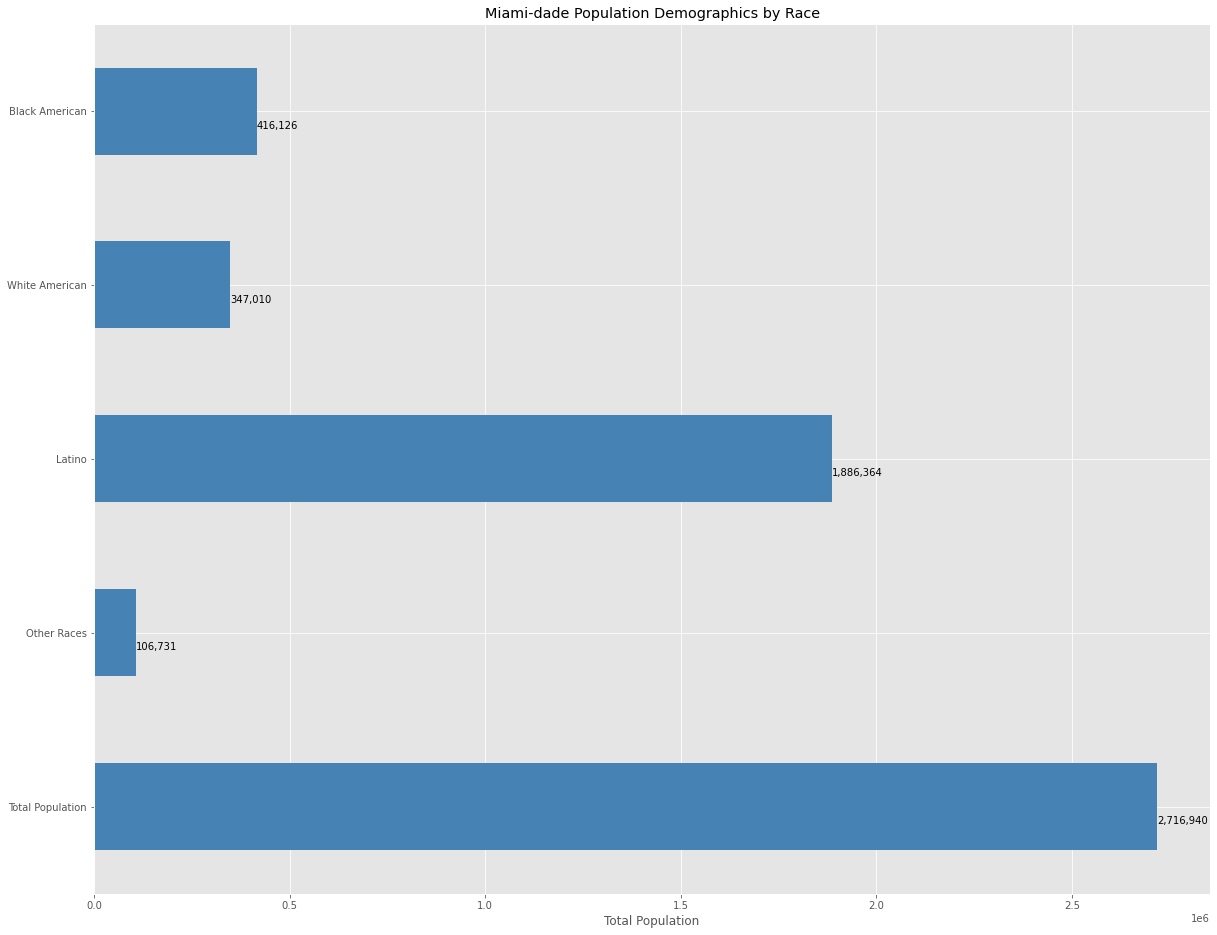

In [31]:
import matplotlib as mpl

# We define data for Bar Plot using initially for all population races in Miami-Dade only most relevant groups considered from total
df311=df31['population']

# Define our Graphic evaluation funciton
df311.plot(kind='barh', figsize=(20, 16), color='steelblue')
plt.xlabel('Total Population')
plt.title('Miami-dade Population Demographics by Race')

# annotate value labels to each country
for index, value in enumerate(df311):
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value, index - 0.10), color='black')

plt.show()

### Race Demographics by Age Range<a name="age"></a>
[return to exploratory Analysis](#analysis)

In [32]:
df32=df3.tail(3)
df32.set_index(['Label'], inplace=True)
df32

Total Population  Other Races  Latino  White American  \
Label                                                                      
18 to 34 years               608544        26007  402966           78772   
35 to 64 years              1106670        42212  804772          124957   
65 years and over            452047        10772  318020           68626   

                   Black American  
Label                              
18 to 34 years             107473  
35 to 64 years             151676  
65 years and over           57126

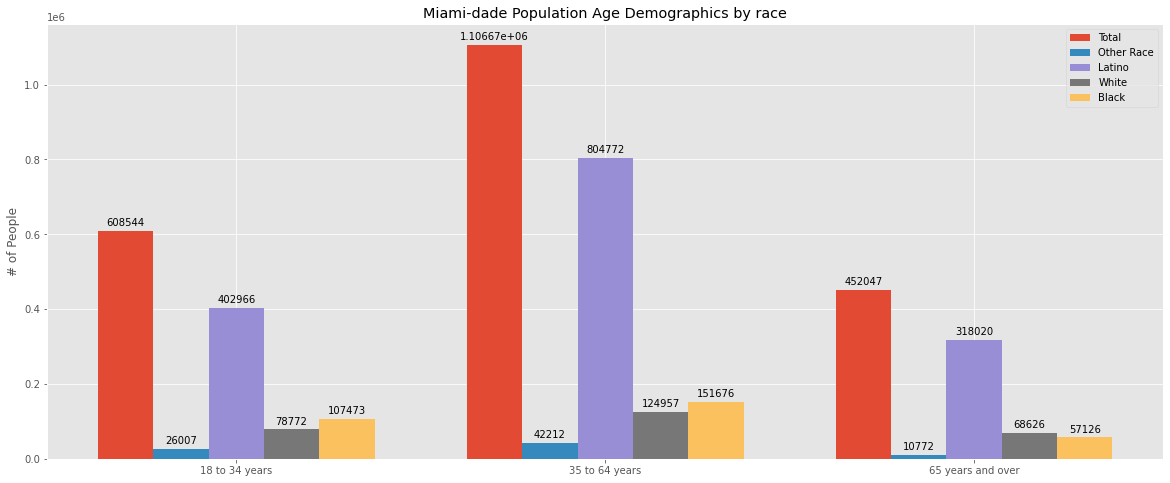

In [33]:
labels = df32.index.to_list()
total = df32['Total Population'].tolist()
other = df32['Other Races'].tolist()
latino = df32['Latino'].tolist()
white = df32['White American'].tolist()
black = df32['Black American'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

plt.rcParams["figure.figsize"] = (20,8)

fig, ax = plt.subplots()
rects1 = ax.bar(x - .30, total, width, label='Total')
rects2 = ax.bar(x - .15, other, width, label='Other Race')
rects3 = ax.bar(x , latino, width, label='Latino')
rects4 = ax.bar(x + .15, white, width, label='White')
rects5 = ax.bar(x + .30, black, width, label='Black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of People')
ax.set_title('Miami-dade Population Age Demographics by race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)

fig

plt.show()


In [34]:
df321=df32.transpose()
df321.drop('Total Population', axis=0, inplace=True)
df321.describe()

Label  18 to 34 years  35 to 64 years  65 years and over
count        4.000000         4.00000           4.000000
mean    153804.500000    280904.25000      113636.000000
std     169499.398265    352340.22151      138531.707745
min      26007.000000     42212.00000       10772.000000
25%      65580.750000    104270.75000       45537.500000
50%      93122.500000    138316.50000       62876.000000
75%     181346.250000    314950.00000      130974.500000
max     402966.000000    804772.00000      318020.000000

Based on this initial exploratory analysis we have evidenced the strong presence of latino population on the Miami-Dade area quantifying out of Total population, totaling 1,8MM out of 2.8MM in Miami-Dade County. Also on the second part of the study we can see the Age Range 35 - 64 that represent the majority of the population tell us Miami-Dade different to the conception people have of Florida as an State preferred by the Retired, is significantly young. 

### Latino Population Demographics<a name="lat"></a>
[return to exploratory Analysis](#analysis)

Table Extracted from General Census Table S0201 Product: 2019: ACS 1-Year Estimates Selected Population Profiles. taking the full estimate and disregarding for our purpose the 10% variability on the available Census estimations.

All Data has been pre-Processed to remove additional fields, Column names and other changes to make the data suitable and exportable to a CSV File. 'Total population' Numbers reflect full extent of Latino population, for this report we have exclude population details belonging to Age Range under 18 years old as won't represent a target for the Restaurant project.

Other Hispanic Field, Central American and Other South American fields have been modified to exclude countries already represented. Total Population difference with sum of individual Values account for population under 18 years Old and Mexican Populatio not segregate on the Original data.

In [35]:
df1=df_1
df1.rename(columns={'Hispanic Any Race':'Total Latino'}, inplace=True)
df11= df1.transpose()
df11

Label                 Total population  18 to 34 years  35 to 64 years  \
Total Latino                   1886364          402966          804772   
Puerto Rican                     98436           23195           40299   
Cuban                           986926          183044          420769   
Other Hispanic                  113991           30815           42547   
Dominican                        70052           16862           28236   
Central American                 75620           20388           27352   
Honduran                         71787           19405           27290   
Nicaraguan                      116948           24880           57517   
Other South American            107875           22236           51425   
Colombian                       139104           33429           63911   
Venezuelan                      105625           28712           45426   

Label                 65 years and over  
Total Latino                     318020  
Puerto Rican                      12146  
Cuban                            220760  
Other Hispanic                     8087  
Dominican                         11107  
Central American                   7584  
Honduran                           5191  
Nicaraguan                        10534  
Other South American              17072  
Colombian                         19310  
Venezuelan                         6229

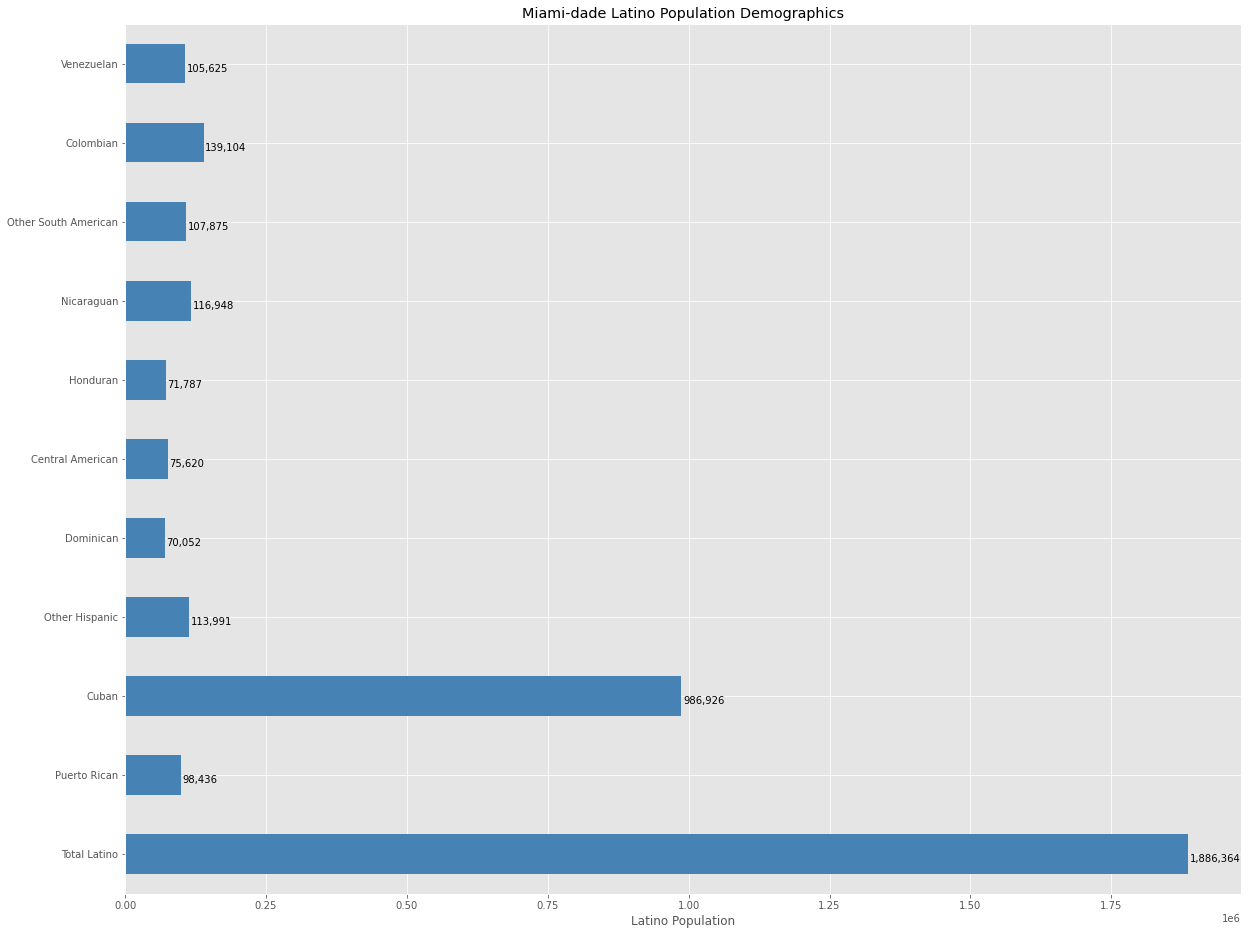

In [36]:
# We define data for Bar Plot using initially total Latino Population
df111=df11['Total population']

# Define our Graphic evaluation funciton
df111.plot(kind='barh', figsize=(20, 16), color='steelblue')
plt.xlabel('Latino Population')
plt.title('Miami-dade Latino Population Demographics')

# annotate value labels to each country
for index, value in enumerate(df111):
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value + 3000, index - 0.10), color='black')

plt.show()

In [79]:
df12=df1.head(1)
df122=df12[['Puerto Rican', 'Cuban', 'Other Hispanic', 'Dominican', 'Central American', 'Honduran', 'Nicaraguan', 'Other South American', 'Colombian', 'Venezuelan']].apply(lambda x: x/x.sum(), axis=1)
df122=round(df122, 4)*100
df122.rename(index={"Total population":"Total population in %"}, inplace=True)
df122

Puerto Rican  Cuban  Other Hispanic  Dominican  \
Label                                                                   
Total population in %          5.22  52.32            6.04       3.71   

                       Central American  Honduran  Nicaraguan  \
Label                                                           
Total population in %              4.01      3.81         6.2   

                       Other South American  Colombian  Venezuelan  
Label                                                               
Total population in %                  5.72       7.37         5.6

Based on the Graphic and percentual division we can see the Cuban population as a majority among the latino community with a 52.32%, in Later years the presence of Venezuelan population has become a significant % ranked among the following top Latino Communities in Miami-Dade.

### Immigrant Population in Miami<a name="immigration"></a>
[return to exploratory Analysis](#analysis)

To highlight the importance of the traditions and food, it has been included a descriptive statistic for the Immigrant portion of Miami Population that was born overseas or has been directly influenced by their homeland culture. the following tables will provide detail about the Continent of Origin 

In [38]:
df4=df_4
df4.set_index(['WORLD REGION OF BIRTH OF FOREIGN BORN'], inplace=True)

In [104]:
df41=df4.head(1)
df41=df41.rename(columns={'Total population':'Total foreign'})
df41['Population']=df31.iloc[0,0]
df41=df41.transpose()
df41=df41.rename(columns={'Foreign-born population excluding population born at sea':'Total division'})
df41=df41['Total division'].astype(str).astype(int)


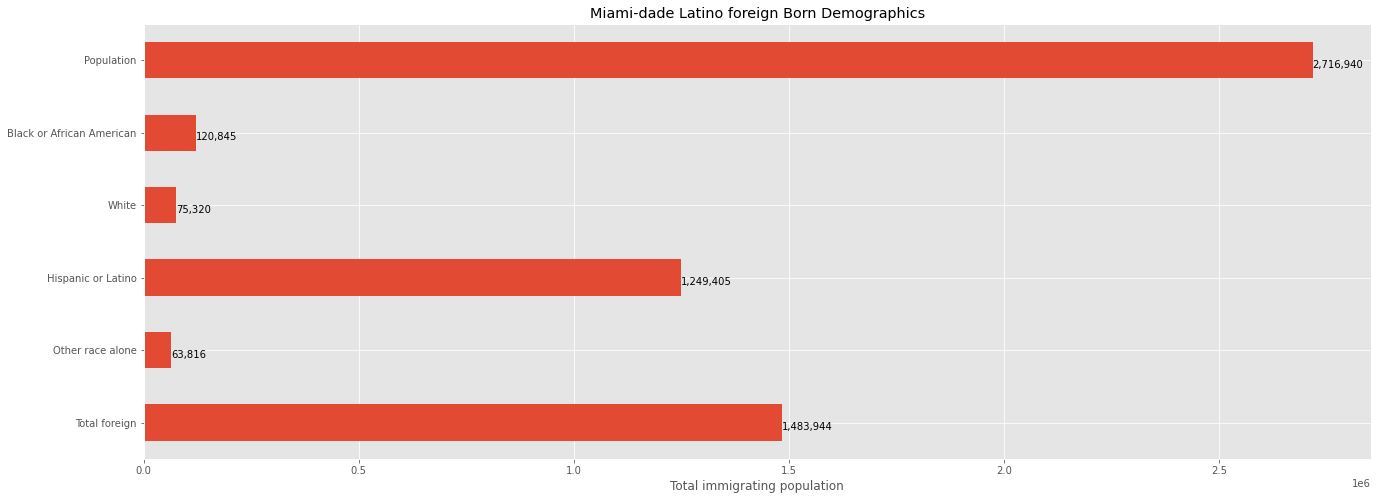

In [105]:
# Define our Graphic evaluation funciton
df41.plot(kind='barh', figsize=(22, 8))
plt.xlabel('Total immigrating population')
plt.title('Miami-dade Latino foreign Born Demographics')

# annotate value labels to each country
for index, value in enumerate(df41):
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value, index - 0.10), color='black')
    

plt.show()

In [41]:
df42=df4.tail(6)
df42=df42.replace({'%':''}, regex=True)
df42=df42.astype(str).astype(float)


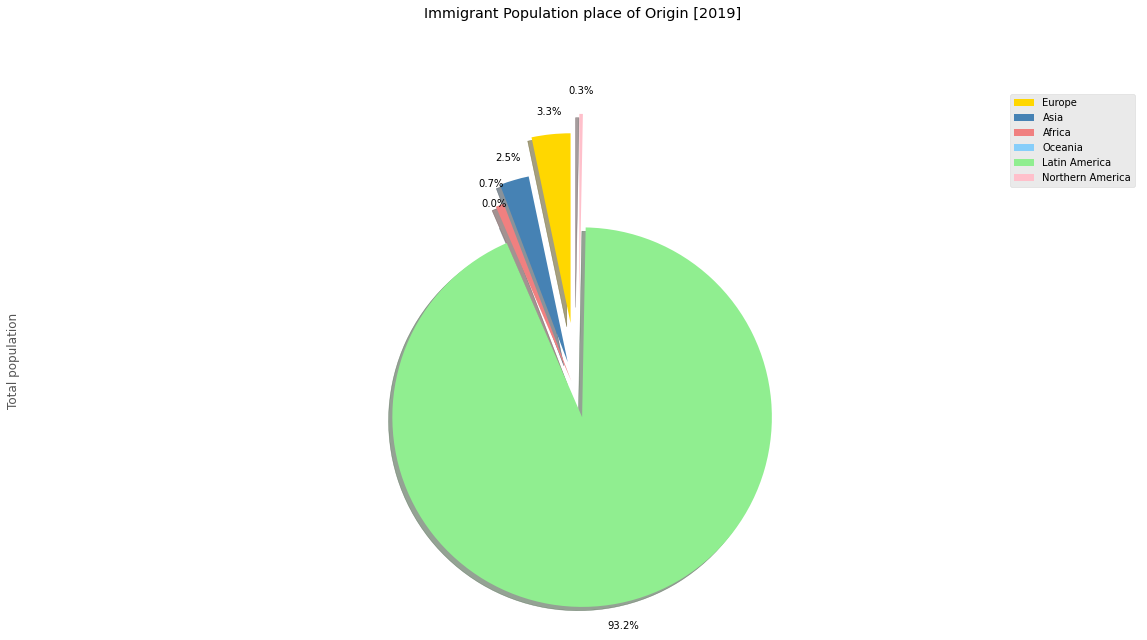

In [42]:
colors_list = ['gold', 'Steelblue', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.4, 0.2, 0.1, 0, 0.1, 0.5] # ratio for each continent with which to offset each wedge.

df42['Total population'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigrant Population place of Origin [2019]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df42.index, loc='upper right') 

plt.show()

### Income Demographics<a name="indem"></a>
[return to exploratory Analysis](#analysis)

In [43]:
df2=df_2
df2.set_index(['Income Range USD'], drop=True, inplace=True)
df22=df2.transpose()
df22

Income Range USD                 Less than 10,000  10,000 to 14,999  \
Household income                              9.0               5.4   
Family Income                                 4.9               3.8   
Married no Kids                               2.4               2.7   
Singles or non Family household              19.3               9.7   

Income Range USD                 15,000 to 24,999  25,000 to 34,999  \
Household income                             11.1              10.4   
Family Income                                10.4              10.9   
Married no Kids                               7.5               8.7   
Singles or non Family household              14.3              10.6   

Income Range USD                 35,000 to 49,999  50,000 to 74,999  \
Household income                             12.9              16.8   
Family Income                                13.8              17.6   
Married no Kids                              12.4              17.3   
Singles or non Family household              11.3              13.8   

Income Range USD                 75,000 to 99,999  100,000 to 149,999  \
Household income                             11.1                11.9   
Family Income                                11.8                13.6   
Married no Kids                              13.4                17.0   
Singles or non Family household               8.1                 6.9   

Income Range USD                 150,000 to 199,999  200,000 or more  
Household income                                5.0              6.4  
Family Income                                   5.7              7.6  
Married no Kids                                 7.7             10.9  
Singles or non Family household                 2.7              3.3

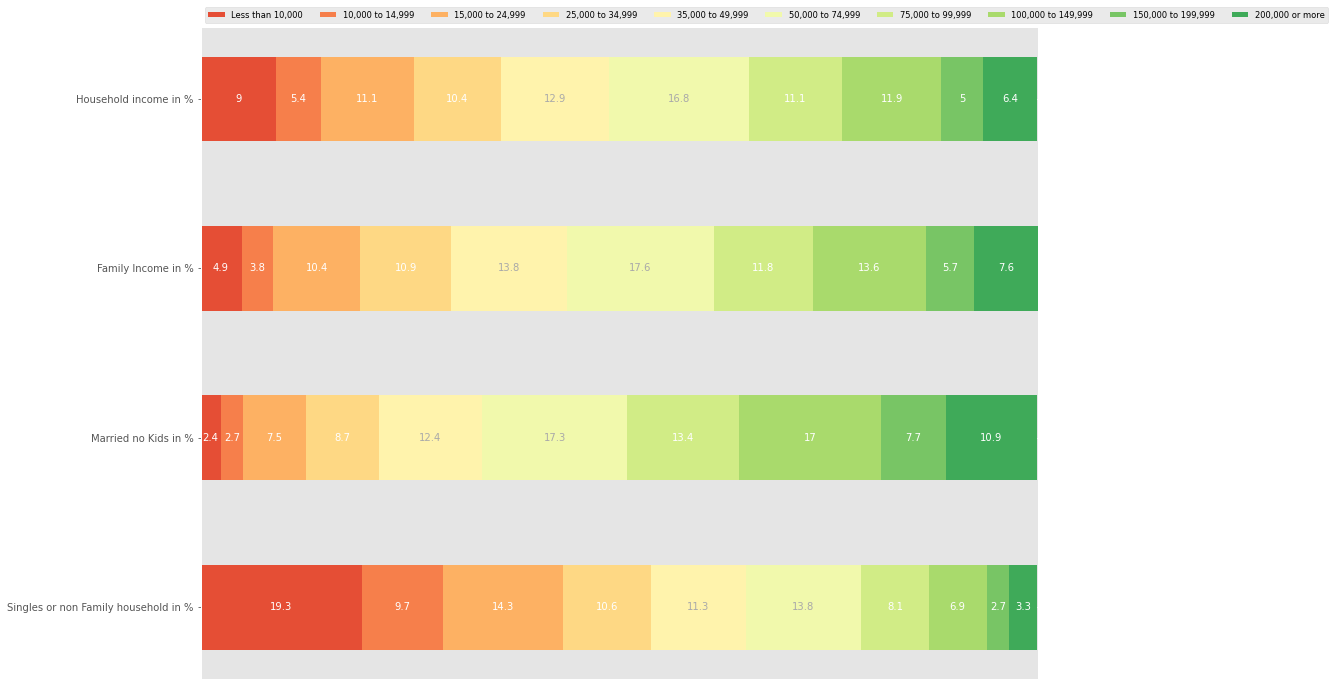

In [85]:
category_names = ['Less than 10,000',
 '10,000 to 14,999',
 '15,000 to 24,999',
 '25,000 to 34,999',
 '35,000 to 49,999',
 '50,000 to 74,999',
 '75,000 to 99,999',
 '100,000 to 149,999',
 '150,000 to 199,999',
 '200,000 or more']
results = {
    'Household income in %': [9.0, 5.4, 11.1, 10.4, 12.9, 16.8, 11.1, 11.9, 5.0, 6.4],
    'Family Income in %': [4.9, 3.8, 10.4, 10.9, 13.8, 17.6, 11.8, 13.6, 5.7, 7.6],
    'Married no Kids in %': [2.4, 2.7, 7.5, 8.7, 12.4, 17.3, 13.4, 17.0, 7.7, 10.9],
    'Singles or non Family household in %':[19.3, 9.7, 14.3, 10.6, 11.3, 13.8, 8.1, 6.9, 2.7, 3.3]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 12))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax


survey(results, category_names)
plt.show()

According to Miami-Dade Beacon Council for 2020 Households in Miami-Dade County earn a median yearly income of \\$52,269. 34.5-percent of the households earn more than the national average each year. 

Based on the information provided by U.S Bureau of Labor, Households in the Miami-Fort Lauderdale-West Palm Beach, FL, metropolitan area spent an average of \\$57,472 per year in 2018–19, the U.S. Bureau of Labor Statistics reported today. Regional Commissioner Janet S. Rankin noted that this figure was significantly lower than the \\$62,395 average expenditure level for households in the United States. Miami-area households allocated their dollars similarly to the nation in five major components, with three differing significantly from their respective U.S. averages. For example, the share of expenditures for entertainment, which accounted for 3.0 percent of the average household’s budget in the Miami area, was significantly lower than the national average of 5.1 percent. 

![Miami Area](https://www.bls.gov/regions/southeast/images/73168.png)

Food: The portion of a Miami household’s budget spent on food, 11.0 percent, was significantly lower than the 12.9-percent U.S. average. Miami-area households spent \\$3,954, or 62.7 percent, of their food dollars on food at home and \\$2,350 (37.3 percent) on food away from home. In comparison, the average U.S. household spent 56.6 percent of its food budget on food at home and 43.4 percent on food away from home.

### Miami Venues Analysis<a name="mva"></a>
[return to exploratory Analysis](#analysis)

From the initial data we have select a sub-List of applicable categories according to the proposal development will be, this include Full Restaurant service with a Latin American influence. Since the Nationalities of the restaurant migth influence we select from the unique Sub-Categories of the Primary Category Food we defined Above on our data Section. 
 Also we kept Spanish Restaurants on the list due to the influence on Latin American cuisine

In [45]:
CLIENT_ID = 'XOWRBRMUUP5YS1RKR0VHUJWCDTDRZ1NOCBCBPKTB20JO2H3V' # your Foursquare ID
CLIENT_SECRET = '22BQEDAKYLZ1B5PHKFUJGWBUK4Q3SRCFBGQCRPIOP4ZLPAW3' # your Foursquare Secret
ACCESS_TOKEN = 'HLN1P3EEBYTDZ2A4PMFKX3MPO1KCRRENTBJBKFKPPE20T0KZ' # your FourSquare Access Token
VERSION = '20210625' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

it has been defined a list of categories of interes from [Foursquare Categories](https://developer.foursquare.com/docs/build-with-foursquare/categories/).\
This include Latin American restaurants and venues with matching categories ID, this will help with the Limit encounter on the API for results, this way will pre-set our categories and allow the data to be more specific to Restaurants and Food proposal desired to evaluate

List: Latin american restaurant,south american rest,argentinian,brazilian,colombian,peruvian,venezuelan,mexican,molecular,spanish, tapas. 


In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryId='4bf58dd8d48988d154941735,4bf58dd8d48988d1cd941735,4bf58dd8d48988d107941735,4bf58dd8d48988d16b941735,58daa1558bbb0b01f18ec1f4,4eb1bfa43b7b52c0e1adc2e8,56aa371be4b08b9a8d573558,4bf58dd8d48988d1c1941735,4bf58dd8d48988d1c2941735,4bf58dd8d48988d150941735,4bf58dd8d48988d1db931735'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, ACCESS_TOKEN, VERSION, categoryId, radius, LIMIT)
            
  # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    mia_rest = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    mia_rest.columns = ['Community', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(mia_rest)

##### Iterate Venue information request on each community Defined

In [47]:
miami_venues2 = getNearbyVenues(names=miami['Community'],
                                   latitudes=miami['Latitude'],
                                   longitudes=miami['Longitude']
                                  )

Aventura
Bal Harbour
Bay Harbor Islands
Biscayne Park
Coral Gables
Cutler Bay
Doral
El Portal
Florida City
Golden Beach
Hialeah
Hialeah Gardens
Homestead
Indian Creek
Key Biscayne
Medley
Miami
Miami Beach
Miami Gardens
Miami Lakes
Miami Shores
Miami Springs
North Bay Village
North Miami
North Miami Beach
Opa-locka
Palmetto Bay
Pinecrest
South Miami
Sunny Isles Beach
Surfside
Sweetwater
Virginia Gardens
West Miami


In [48]:
miami_venues2.shape

(2320, 7)

In [109]:
print('There are {} uniques categories related to Restaurants of interest. and {} unique Venues'.format(len(miami_venues2['Venue Category'].unique()),len(miami_venues2['Venue'].unique())))

There are 52 uniques categories related to Restaurants of interest. and 791 unique Venues


In [50]:
miami_venues2.head()

Community  Community Latitude  Community Longitude                   Venue  \
0  Aventura            25.95701              -80.147             Cvi.Che 105   
1  Aventura            25.95701              -80.147               Novecento   
2  Aventura            25.95701              -80.147   La Estancia Argentina   
3  Aventura            25.95701              -80.147  Chipotle Mexican Grill   
4  Aventura            25.95701              -80.147  Chipotle Mexican Grill   

   Venue Latitude  Venue Longitude          Venue Category  
0       25.958353       -80.142053     Peruvian Restaurant  
1       25.950201       -80.144883  Argentinian Restaurant  
2       25.941305       -80.149114  Argentinian Restaurant  
3       25.950185       -80.145676      Mexican Restaurant  
4       25.957264       -80.146385      Mexican Restaurant

###### Grouping by Community will help analyze the Venues tied to each Community center previously defined in Geographical Data.

In [51]:
miami_venues2.groupby('Community').count()

Community Latitude  Community Longitude  Venue  \
Community                                                            
Aventura                            73                   73     73   
Bal Harbour                         64                   64     64   
Bay Harbor Islands                  73                   73     73   
Biscayne Park                       54                   54     54   
Coral Gables                        93                   93     93   
Cutler Bay                          25                   25     25   
Doral                              100                  100    100   
El Portal                           43                   43     43   
Florida City                        29                   29     29   
Golden Beach                        56                   56     56   
Hialeah                             75                   75     75   
Hialeah Gardens                     58                   58     58   
Homestead                           28                   28     28   
Indian Creek                        74                   74     74   
Key Biscayne                        14                   14     14   
Medley                              84                   84     84   
Miami                              100                  100    100   
Miami Beach                        100                  100    100   
Miami Gardens                       56                   56     56   
Miami Lakes                         76                   76     76   
Miami Shores                       100                  100    100   
Miami Springs                      100                  100    100   
North Bay Village                   81                   81     81   
North Miami                         43                   43     43   
North Miami Beach                   35                   35     35   
Opa-locka                           25                   25     25   
Palmetto Bay                       100                  100    100   
Pinecrest                           27                   27     27   
South Miami                        100                  100    100   
Sunny Isles Beach                   74                   74     74   
Surfside                            60                   60     60   
Sweetwater                         100                  100    100   
Virginia Gardens                   100                  100    100   
West Miami                         100                  100    100   

                    Venue Latitude  Venue Longitude  Venue Category  
Community                                                            
Aventura                        73               73              73  
Bal Harbour                     64               64              64  
Bay Harbor Islands              73               73              73  
Biscayne Park                   54               54              54  
Coral Gables                    93               93              93  
Cutler Bay                      25               25              25  
Doral                          100              100             100  
El Portal                       43               43              43  
Florida City                    29               29              29  
Golden Beach                    56               56              56  
Hialeah                         75               75              75  
Hialeah Gardens                 58               58              58  
Homestead                       28               28              28  
Indian Creek                    74               74              74  
Key Biscayne                    14               14              14  
Medley                          84               84              84  
Miami                          100              100             100  
Miami Beach                    100              100             100  
Miami Gardens                   56               56              56  
Miami Lakes                  

In [52]:
# one hot encoding to determined the ocurrence of Each venue and find out top 10 proposals in the area
miahot = pd.get_dummies(miami_venues2[['Venue Category']], prefix="", prefix_sep="")
miahot['Community'] = miami_venues2['Community'] 
fixed_columns = [miahot.columns[-1]] + list(miahot.columns[:-1])
miahot = miahot[fixed_columns]
miahot.shape

(2320, 53)

###### Hot Encoding to determine the number of ocurrence of each unique venue type per Community will support defining the most relevant

In [53]:
Miami_Rest=miahot.groupby('Community').mean().reset_index()
Miami_Rest.head()

Community  American Restaurant  Arepa Restaurant  \
0            Aventura             0.000000          0.013699   
1         Bal Harbour             0.000000          0.000000   
2  Bay Harbor Islands             0.000000          0.000000   
3       Biscayne Park             0.000000          0.000000   
4        Coral Gables             0.010753          0.000000   

   Argentinian Restaurant  BBQ Joint    Bakery  Bar  Brazilian Restaurant  \
0                0.109589        0.0  0.013699  0.0              0.109589   
1                0.093750        0.0  0.000000  0.0              0.156250   
2                0.095890        0.0  0.000000  0.0              0.150685   
3                0.037037        0.0  0.000000  0.0              0.092593   
4                0.075269        0.0  0.021505  0.0              0.010753   

   Breakfast Spot  Burger Joint  Burrito Place   Butcher      Café  \
0        0.000000      0.000000       0.013699  0.000000  0.013699   
1        0.015625      0.015625       0.031250  0.000000  0.000000   
2        0.013699      0.013699       0.027397  0.000000  0.000000   
3        0.000000      0.018519       0.037037  0.018519  0.000000   
4        0.000000      0.000000       0.000000  0.000000  0.032258   

   Chinese Restaurant  Cocktail Bar  Coffee Shop  College Academic Building  \
0                 0.0           0.0     0.000000                   0.013699   
1                 0.0           0.0     0.015625                   0.015625   
2                 0.0           0.0     0.013699                   0.000000   
3                 0.0           0.0     0.000000                   0.000000   
4                 0.0           0.0     0.000000                   0.000000   

   Colombian Restaurant  Cuban Restaurant  Deli / Bodega     Diner  \
0              0.000000          0.136986       0.000000  0.000000   
1              0.000000          0.171875       0.015625  0.000000   
2              0.000000          0.178082       0.013699  0.000000   
3              0.000000          0.148148       0.000000  0.000000   
4              0.010753          0.236559       0.000000  0.010753   

   Fast Food Restaurant  Financial or Legal Service  Food Truck  \
0              0.000000                         0.0    0.000000   
1              0.015625                         0.0    0.015625   
2              0.013699                         0.0    0.013699   
3              0.018519                         0.0    0.000000   
4              0.000000                         0.0    0.000000   

   Grocery Store  Health Food Store  Hotel  Ice Cream Shop  Juice Bar  \
0       0.013699                0.0    0.0             0.0        0.0   
1       0.000000                0.0    0.0             0.0        0.0   
2       0.000000                0.0    0.0             0.0        0.0   
3       0.000000                0.0    0.0             0.0        0.0   
4       0.021505                0.0    0.0             0.0        0.0   

   Latin American Restaurant    Market  Mexican Restaurant  Music Venue  \
0                   0.027397  0.000000            0.219178          0.0   
1                   0.015625  0.000000            0.218750          0.0   
2                   0.013699  0.013699            0.232877          0.0   
3                   0.018519  0.000000            0.259259          0.0   
4                   0.000000  0.000000            0.193548          0.0   

   New American Restaurant  Nightclub  Paella Restaurant  Peruvian Restaurant  \
0                 0.000000        0.0                0.0             0.123288   
1                 0.000000        0.0                0.0             0.078125   
2                 0.000000        0.0                0.0             0.068493   
3                 0.018519        0.0                0.0             0.037037   
4                 0.000000        0.0                0.0             0.010753   

   Peruvian Roast Chicken Joint  Pizza Place  Pub  Restaurant  Sand

In [54]:
Miami_Rest.describe()

American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
count            34.000000         34.000000               34.000000   
mean              0.004196          0.000928                0.059912   
std               0.008806          0.003803                0.041893   
min               0.000000          0.000000                0.000000   
25%               0.000000          0.000000                0.017500   
50%               0.000000          0.000000                0.070000   
75%               0.000000          0.000000                0.085489   
max               0.037037          0.017857                0.142857   

       BBQ Joint     Bakery        Bar  Brazilian Restaurant  Breakfast Spot  \
count  34.000000  34.000000  34.000000             34.000000       34.000000   
mean    0.002227   0.017016   0.002451              0.059555        0.002407   
std     0.009057   0.025012   0.005704              0.047626        0.005359   
min     0.000000   0.000000   0.000000              0.000000        0.000000   
25%     0.000000   0.000000   0.000000              0.020952        0.000000   
50%     0.000000   0.005000   0.000000              0.040000        0.000000   
75%     0.000000   0.028452   0.000000              0.104229        0.000000   
max     0.040000   0.111111   0.020000              0.156250        0.016667   

       Burger Joint  Burrito Place    Butcher       Café  Chinese Restaurant  \
count     34.000000      34.000000  34.000000  34.000000           34.000000   
mean       0.004918       0.009951   0.001592   0.008543            0.000350   
std        0.008920       0.014893   0.005366   0.010782            0.002042   
min        0.000000       0.000000   0.000000   0.000000            0.000000   
25%        0.000000       0.000000   0.000000   0.000000            0.000000   
50%        0.000000       0.000000   0.000000   0.000000            0.000000   
75%        0.011759       0.017857   0.000000   0.013652            0.000000   
max        0.040000       0.046512   0.023256   0.034483            0.011905   

       Cocktail Bar  Coffee Shop  College Academic Building  \
count     34.000000    34.000000                  34.000000   
mean       0.001095     0.006721                   0.003835   
std        0.003719     0.008015                   0.007995   
min        0.000000     0.000000                   0.000000   
25%        0.000000     0.000000                   0.000000   
50%        0.000000     0.000000                   0.000000   
75%        0.000000     0.011759                   0.000000   
max        0.017241     0.026667                   0.028571   

       Colombian Restaurant  Cuban Restaurant  Deli / Bodega      Diner  \
count             34.000000         34.000000      34.000000  34.000000   
mean               0.004991          0.214717       0.002044   0.000316   
std                0.015277          0.090828       0.005076   0.001844   
min                0.000000          0.068966       0.000000   0.000000   
25%                0.000000          0.144180       0.000000   0.000000   
50%                0.000000          0.195238       0.000000   0.000000   
75%                0.000000          0.256944       0.000000   0.000000   
max                0.078947          0.450000       0.016667   0.010753   

       Fast Food Restaurant  Financial or Legal Service  Food Truck  \
count             34.000000                   34.000000   34.000000   
mean               0.005964                    0.000350    0.002805   
std                0.007571                    0.002042    0.005667   
min                0.000000                    0.000000    0.000000   
25%                0.000000                    0.000000    0.000000   
50%                0.000000                    0.000000    0.000000   
75%                0.013289                    0.000000    0.000000   
max                0.023256                    0.011905    0.016667   

       Grocery Store  Health Foo

#### Highlight the Top 10 Venues by Community

Given the diversity of the communities, we will approach our Communities based on the Top Restaurant Venues Categories as areas with significant population of each cuisine, this information should help to guide the gastronomic proposal and theme of the Restaurant by our Stakeholders and provide an starting point for further analysis on the selected Areas.

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Restaurant Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Restaurant Venue'.format(ind+1))

# create a new dataframe
mvs = pd.DataFrame(columns=columns)
mvs['Community'] = Miami_Rest['Community']

for ind in np.arange(Miami_Rest.shape[0]):
    mvs.iloc[ind, 1:] = return_most_common_venues(Miami_Rest.iloc[ind, :], num_top_venues)

mvs.head()

Community 1st Restaurant Venue 2nd Restaurant Venue  \
0            Aventura   Mexican Restaurant     Cuban Restaurant   
1         Bal Harbour   Mexican Restaurant     Cuban Restaurant   
2  Bay Harbor Islands   Mexican Restaurant     Cuban Restaurant   
3       Biscayne Park   Mexican Restaurant     Cuban Restaurant   
4        Coral Gables     Cuban Restaurant   Mexican Restaurant   

   3rd Restaurant Venue    4th Restaurant Venue       5th Restaurant Venue  \
0   Peruvian Restaurant  Argentinian Restaurant       Brazilian Restaurant   
1  Brazilian Restaurant  Argentinian Restaurant        Peruvian Restaurant   
2  Brazilian Restaurant  Argentinian Restaurant        Peruvian Restaurant   
3  Brazilian Restaurant        Tapas Restaurant  South American Restaurant   
4    Spanish Restaurant  Argentinian Restaurant  South American Restaurant   

        6th Restaurant Venue 7th Restaurant Venue       8th Restaurant Venue  \
0  South American Restaurant           Taco Place         Spanish Restaurant   
1  South American Restaurant        Burrito Place  Latin American Restaurant   
2  South American Restaurant        Burrito Place                 Restaurant   
3              Burrito Place   Spanish Restaurant        Peruvian Restaurant   
4           Tapas Restaurant           Taco Place                       Café   

    9th Restaurant Venue      10th Restaurant Venue  
0  Venezuelan Restaurant  Latin American Restaurant  
1             Food Truck       Fast Food Restaurant  
2           Burger Joint             Breakfast Spot  
3             Taco Place         Tex-Mex Restaurant  
4                 Bakery              Grocery Store

in this case please note that Mexican Restaurant is Present significantly on the top Venues, but from deeper analysis this include chain restaurants such as Chipotle Mexican Grill that are not part of our Scope, it is recommended to treat this point as an outlier and don't assign excessive weight on the influence cuisine

#### Evaluate Clusters crossing Communities and Venues nearby with the desired characteristics

Once we have determined the Top Restaurant Venues Categories by Community we will create clusters on the Miami-Dade Area to find out the concentration of these venues around the communities. On one side we could take this clusters as places where direct competition is already positiones with a functioning business, but one important aspect to consider is that these are proven working locations by other businesses that will provide both the traffic and the public to the Venture, on Communities targeted for the project.

In [57]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [58]:
# set number of clusters
kclusters = 5

mvs_cluster = Miami_Rest.drop('Community', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mvs_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


array([1, 1, 1, 1, 0, 0, 4, 0, 2, 1], dtype=int32)

In [59]:
# add clustering labels
mvs.insert(0, 'Cluster Labels', kmeans.labels_)

dfMM = miami

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
dfMM = dfMM.join(mvs.set_index('Community'), on='Community')

dfMM.head() # check the last columns!

Community   Latitude  Longitude  Cluster Labels  \
0            Aventura  25.957010 -80.147000               1   
1         Bal Harbour  25.896858 -80.124383               1   
2  Bay Harbor Islands  25.891075 -80.131900               1   
3       Biscayne Park  25.881260 -80.179990               1   
4        Coral Gables  25.728414 -80.251520               0   

  1st Restaurant Venue 2nd Restaurant Venue  3rd Restaurant Venue  \
0   Mexican Restaurant     Cuban Restaurant   Peruvian Restaurant   
1   Mexican Restaurant     Cuban Restaurant  Brazilian Restaurant   
2   Mexican Restaurant     Cuban Restaurant  Brazilian Restaurant   
3   Mexican Restaurant     Cuban Restaurant  Brazilian Restaurant   
4     Cuban Restaurant   Mexican Restaurant    Spanish Restaurant   

     4th Restaurant Venue       5th Restaurant Venue  \
0  Argentinian Restaurant       Brazilian Restaurant   
1  Argentinian Restaurant        Peruvian Restaurant   
2  Argentinian Restaurant        Peruvian Restaurant   
3        Tapas Restaurant  South American Restaurant   
4  Argentinian Restaurant  South American Restaurant   

        6th Restaurant Venue 7th Restaurant Venue       8th Restaurant Venue  \
0  South American Restaurant           Taco Place         Spanish Restaurant   
1  South American Restaurant        Burrito Place  Latin American Restaurant   
2  South American Restaurant        Burrito Place                 Restaurant   
3              Burrito Place   Spanish Restaurant        Peruvian Restaurant   
4           Tapas Restaurant           Taco Place                       Café   

    9th Restaurant Venue      10th Restaurant Venue  
0  Venezuelan Restaurant  Latin American Restaurant  
1             Food Truck       Fast Food Restaurant  
2           Burger Joint             Breakfast Spot  
3             Taco Place         Tex-Mex Restaurant  
4                 Bakery              Grocery Store

#### Graphical Depiction of Venue Clusters

In [60]:
from folium import plugins
import matplotlib.cm as cm

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
Category = plugins.MarkerCluster().add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfMM['Latitude'], dfMM['Longitude'], dfMM['Community'], dfMM['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(miami_venues2['Venue Latitude'], miami_venues2['Venue Longitude'],miami_venues2['Venue Category']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(Category)

       
map_clusters

### Cluster Analysis

Once the cluster have been defined, we will proceed with cluster analysis on each of the 5 and provide insights on the findings.

In [61]:
dfMM1= dfMM.loc[dfMM['Cluster Labels'] == 0, dfMM.columns[[0] + list(range(3, dfMM.shape[1]))]]
dfMM1

Community  Cluster Labels 1st Restaurant Venue  \
4       Coral Gables               0     Cuban Restaurant   
5         Cutler Bay               0   Mexican Restaurant   
7          El Portal               0   Mexican Restaurant   
12         Homestead               0   Mexican Restaurant   
14      Key Biscayne               0   Spanish Restaurant   
16             Miami               0     Cuban Restaurant   
19       Miami Lakes               0     Cuban Restaurant   
27         Pinecrest               0     Cuban Restaurant   
28       South Miami               0     Cuban Restaurant   
32  Virginia Gardens               0     Cuban Restaurant   
33        West Miami               0     Cuban Restaurant   

      2nd Restaurant Venue  3rd Restaurant Venue    4th Restaurant Venue  \
4       Mexican Restaurant    Spanish Restaurant  Argentinian Restaurant   
5         Cuban Restaurant    Spanish Restaurant     Peruvian Restaurant   
7       Spanish Restaurant      Tapas Restaurant        Cuban Restaurant   
12        Cuban Restaurant    Spanish Restaurant                  Bakery   
14  Argentinian Restaurant    Mexican Restaurant     Peruvian Restaurant   
16      Mexican Restaurant    Spanish Restaurant     Peruvian Restaurant   
19      Mexican Restaurant  Colombian Restaurant      Spanish Restaurant   
27      Mexican Restaurant    Spanish Restaurant                  Bakery   
28      Mexican Restaurant    Spanish Restaurant  Argentinian Restaurant   
32      Mexican Restaurant    Spanish Restaurant  Argentinian Restaurant   
33      Mexican Restaurant    Spanish Restaurant     Peruvian Restaurant   

         5th Restaurant Venue       6th Restaurant Venue  \
4   South American Restaurant           Tapas Restaurant   
5       Venezuelan Restaurant                  BBQ Joint   
7      Argentinian Restaurant      Venezuelan Restaurant   
12        Peruvian Restaurant             Sandwich Place   
14           Cuban Restaurant             Sandwich Place   
16     Argentinian Restaurant  South American Restaurant   
19                     Bakery  South American Restaurant   
27        Peruvian Restaurant       Brazilian Restaurant   
28        Peruvian Restaurant  South American Restaurant   
32           Tapas Restaurant  South American Restaurant   
33     Argentinian Restaurant       Brazilian Restaurant   

     7th Restaurant Venue       8th Restaurant Venue  \
4              Taco Place                       Café   
5                  Bakery       Brazilian Restaurant   
7    Brazilian Restaurant                 Taco Place   
12  Venezuelan Restaurant                  BBQ Joint   
14     Seafood Restaurant  Latin American Restaurant   
16       Tapas Restaurant       Brazilian Restaurant   
19    Peruvian Restaurant      Venezuelan Restaurant   
27    American Restaurant          Health Food Store   
28                 Bakery       Brazilian Restaurant   
32                 Bakery              Grocery Store   
33             Taco Place  South American Restaurant   

         9th Restaurant Venue         10th Restaurant Venue  
4                      Bakery                 Grocery Store  
5   South American Restaurant                Sandwich Place  
7                         Pub                Sandwich Place  
12       Brazilian Restaurant             Health Food Store  
14                Supermarket  Peruvian Roast Chicken Joint  
16                 Taco Place                        Bakery  
19           Tapas Restaurant     Latin American Restaurant  
27             Sandwich Place         Venezuelan Restaurant  
28           Tapas Restaurant                           Bar  
32        American Restaurant          Colombian Restaurant  
33           Tapas Restaurant                Sandwich Place

Cluster 1 Include the Communities listed on the table above, it is important to mention the most relevant communities such as Miami, Key Biscayne, Coral Gables, and West Miami correspond to the Southern Miami-Dade area, with excellent locations and plenty of Beach front properties. Key Biscayn for example and the areas surrounding have a rich gastronomic evidence since the start of the Cuban exodus, plenty of proposal have passed by and some new terrain for international Chef such as Antonio Bachour, Carlos Leal and others with their international and fusion cuisine. Households in Key Biscayne earn a median yearly income of **\\$126,628. 67.49-percent of the households earn more than the national average each year. Household expenditures average **$141,427 per year**. The majority of earnings get spent on Shelter, Transportation, Food and Beverages, Health Care, and Utilities, with one of the highest spending in Food in the County with a Median of **\\$ 20,204** followed by Coral Gables with **\\$15,319** that also  stands out as a planned community. The Gables Waterway runs through the city. Coral Gables has a robust downtown area and is a major employment center comprised of local and international businesses and the University of Miami.

also an important city included here is Miami,known for its booming downtown business and banking district along Brickell Avenue. The world famous **Little Havana and Calle Ocho are well-known Cuban cultural destinations** and historic **Overtown is a traditionally African-American neighborhood** with it roots in jazz and soul music. Downtown includes performing arts, sports venues and museums. **Wynwood and the Design District are known for art galleries, craft breweries, entrepreneurs and trendy restaurants**. Quaint “old Miami” neighborhoods including the Roads, Coconut Grove, West Flagler, Flagami and Coral Way connect urban areas with residential neighborhoods filled with tree-lined streets. The pintoresque scene might be ideal to bring that mixed with the Spanish heritage and the Latino representation in the country that the proposal will like to add to the County Scene.

Communities in the cluster have a good proximity with this interesting area, and may present more accessible options in terms of commercial rent and cost for the proposal, further details are recommended to take in consideration. From the Venue data clustered evidence of a strong Cuban & Spanish Venue presence coming on Top along with some Mexican proposals, setting aside the Chain restaurants as mention on the descriptive analysis above, that reinforce the facts on the Cities highlighted on the Top 5 Places in Venues.

##### Cluster 2

In [62]:
dfMM.loc[dfMM['Cluster Labels'] == 1, dfMM.columns[[0] + list(range(3, dfMM.shape[1]))]]

Community  Cluster Labels 1st Restaurant Venue  \
0             Aventura               1   Mexican Restaurant   
1          Bal Harbour               1   Mexican Restaurant   
2   Bay Harbor Islands               1   Mexican Restaurant   
3        Biscayne Park               1   Mexican Restaurant   
9         Golden Beach               1   Mexican Restaurant   
13        Indian Creek               1   Mexican Restaurant   
17         Miami Beach               1   Mexican Restaurant   
18       Miami Gardens               1   Mexican Restaurant   
22   North Bay Village               1   Mexican Restaurant   
23         North Miami               1   Mexican Restaurant   
24   North Miami Beach               1   Mexican Restaurant   
29   Sunny Isles Beach               1   Mexican Restaurant   
30            Surfside               1   Mexican Restaurant   

      2nd Restaurant Venue    3rd Restaurant Venue    4th Restaurant Venue  \
0         Cuban Restaurant     Peruvian Restaurant  Argentinian Restaurant   
1         Cuban Restaurant    Brazilian Restaurant  Argentinian Restaurant   
2         Cuban Restaurant    Brazilian Restaurant  Argentinian Restaurant   
3         Cuban Restaurant    Brazilian Restaurant        Tapas Restaurant   
9   Argentinian Restaurant        Cuban Restaurant    Brazilian Restaurant   
13        Cuban Restaurant    Brazilian Restaurant  Argentinian Restaurant   
17        Cuban Restaurant     Peruvian Restaurant  Argentinian Restaurant   
18    Brazilian Restaurant     Peruvian Restaurant        Cuban Restaurant   
22        Cuban Restaurant  Argentinian Restaurant    Brazilian Restaurant   
23        Cuban Restaurant    Brazilian Restaurant     Peruvian Restaurant   
24        Cuban Restaurant     Peruvian Restaurant    Brazilian Restaurant   
29        Cuban Restaurant    Brazilian Restaurant     Peruvian Restaurant   
30        Cuban Restaurant    Brazilian Restaurant  Argentinian Restaurant   

         5th Restaurant Venue       6th Restaurant Venue  \
0        Brazilian Restaurant  South American Restaurant   
1         Peruvian Restaurant  South American Restaurant   
2         Peruvian Restaurant  South American Restaurant   
3   South American Restaurant              Burrito Place   
9         Peruvian Restaurant                 Taco Place   
13        Peruvian Restaurant  South American Restaurant   
17       Brazilian Restaurant           Tapas Restaurant   
18  South American Restaurant     Argentinian Restaurant   
22           Tapas Restaurant         Spanish Restaurant   
23  South American Restaurant         Tex-Mex Restaurant   
24  South American Restaurant         Tex-Mex Restaurant   
29     Argentinian Restaurant  South American Restaurant   
30        Peruvian Restaurant  South American Restaurant   

         7th Restaurant Venue       8th Restaurant Venue  \
0                  Taco Place         Spanish Restaurant   
1               Burrito Place  Latin American Restaurant   
2               Burrito Place                 Restaurant   
3          Spanish Restaurant        Peruvian Restaurant   
9   South American Restaurant      Venezuelan Restaurant   
13         Tex-Mex Restaurant              Burrito Place   
17         Spanish Restaurant        American Restaurant   
18      Venezuelan Restaurant         Tex-Mex Restaurant   
22        Peruvian Restaurant                 Taco Place   
23              Burrito Place         Spanish Restaurant   
24  Latin American Restaurant                       Café   
29              Burrito Place      Venezuelan Restaurant   
30                 Restaurant              Burrito Place   

         9th Restaurant Venue      10th Restaurant Venue  
0       Venezuelan Restaurant  Latin American Restaurant  
1                  Food Truck       Fast Food Restaurant  
2                Burger Joint             Breakfast Spot  
3                  Taco Place         Tex-Mex Restaurant  
9   Latin American Restaurant         Spanish Restaurant  
1

Cluster 2 is considered the competing option including some of the Luxury Areas, filled with Hotels and Tourist affluence, it can highlight **Miami Beach Area** considered a tourist mecca and a vibrant business community exhibing more than 7 miles of Coast line beach, golf courses, parks, and other amenities among wich comes on our interest **art, culture and fine dining**. With Area is relatively small 7.1 square miles between Biscayne Bay and the Atlantic Ocean, which brings relevance to other cities on the cluster as optional locations. 

Nearby another highly interesting area is Bal Harbour portrays deluxe oceanfront hotels, resorts, single-family and condo residences, ultra-chic shopping at the world famous Bal Harbour Shops and a wide selection of dining options. with median yearly income of **\\$64,843. 45.99-percent** of the households earn more than the national average each year. and expenditure in food ranging **\\$ 11,000**, in this case location on the other communities is what makes it interesting to consider naming as most relevant North Bay Village, North Miami, North Miami Beach all excellent location and distance to the centers with higher affluence make great options for locations.

on the Venue analysis again we see again Mexican Restaurant in 1st place, it is consider more relevant the Cuban and Brazilian influence in this case along with Peruvian cuisine proposals.

##### Cluster 3

In [63]:
dfMM.loc[dfMM['Cluster Labels'] == 2, dfMM.columns[[0] + list(range(3, dfMM.shape[1]))]]

Community  Cluster Labels 1st Restaurant Venue 2nd Restaurant Venue  \
8  Florida City               2   Mexican Restaurant       Sandwich Place   

  3rd Restaurant Venue 4th Restaurant Venue 5th Restaurant Venue  \
8     Cuban Restaurant   Tex-Mex Restaurant                 Café   

  6th Restaurant Venue 7th Restaurant Venue 8th Restaurant Venue  \
8                  Pub               Market          Music Venue   

      9th Restaurant Venue 10th Restaurant Venue  
8  New American Restaurant             Nightclub

##### Cluster 4

In [64]:
dfMM.loc[dfMM['Cluster Labels'] == 3, dfMM.columns[[0] + list(range(3, dfMM.shape[1]))]]

Community  Cluster Labels 1st Restaurant Venue 2nd Restaurant Venue  \
10        Hialeah               3     Cuban Restaurant   Spanish Restaurant   
20   Miami Shores               3     Cuban Restaurant   Mexican Restaurant   
21  Miami Springs               3     Cuban Restaurant   Mexican Restaurant   
25      Opa-locka               3     Cuban Restaurant   Mexican Restaurant   
26   Palmetto Bay               3     Cuban Restaurant   Mexican Restaurant   
31     Sweetwater               3     Cuban Restaurant   Mexican Restaurant   

         3rd Restaurant Venue       4th Restaurant Venue  \
10         Mexican Restaurant       Brazilian Restaurant   
20         Spanish Restaurant  South American Restaurant   
21  South American Restaurant         Spanish Restaurant   
25  South American Restaurant         Tex-Mex Restaurant   
26         Spanish Restaurant  South American Restaurant   
31  South American Restaurant         Spanish Restaurant   

      5th Restaurant Venue   6th Restaurant Venue    7th Restaurant Venue  \
10             Coffee Shop             Restaurant          Sandwich Place   
20  Argentinian Restaurant                 Bakery             Coffee Shop   
21     Peruvian Restaurant  Venezuelan Restaurant  Argentinian Restaurant   
25     Peruvian Restaurant         Sandwich Place      Spanish Restaurant   
26  Argentinian Restaurant   Brazilian Restaurant                  Bakery   
31  Argentinian Restaurant   Brazilian Restaurant                  Bakery   

   8th Restaurant Venue       9th Restaurant Venue  10th Restaurant Venue  
10   Tex-Mex Restaurant                 Taco Place                   Café  
20     Tapas Restaurant        American Restaurant  Venezuelan Restaurant  
21               Bakery       Brazilian Restaurant          Grocery Store  
25           Restaurant  Latin American Restaurant           Burger Joint  
26  Peruvian Restaurant                     Winery                   Café  
31  Peruvian Restaurant          Paella Restaurant                 Winery

##### Cluster 5

In [65]:
dfMM.loc[dfMM['Cluster Labels'] == 4, dfMM.columns[[0] + list(range(3, dfMM.shape[1]))]]

Community  Cluster Labels       1st Restaurant Venue  \
6             Doral               4  South American Restaurant   
11  Hialeah Gardens               4         Mexican Restaurant   
15           Medley               4         Mexican Restaurant   

         2nd Restaurant Venue       3rd Restaurant Venue  \
6            Cuban Restaurant         Mexican Restaurant   
11  South American Restaurant           Cuban Restaurant   
15           Cuban Restaurant  South American Restaurant   

      4th Restaurant Venue    5th Restaurant Venue   6th Restaurant Venue  \
6   Argentinian Restaurant      Spanish Restaurant  Venezuelan Restaurant   
11  Argentinian Restaurant              Taco Place     Spanish Restaurant   
15      Spanish Restaurant  Argentinian Restaurant             Taco Place   

   7th Restaurant Venue   8th Restaurant Venue       9th Restaurant Venue  \
6   Peruvian Restaurant       Tapas Restaurant       Brazilian Restaurant   
11  Peruvian Restaurant   Brazilian Restaurant           Sushi Restaurant   
15  Peruvian Restaurant  Venezuelan Restaurant  Latin American Restaurant   

   10th Restaurant Venue  
6                  Hotel  
11         Burrito Place  
15                Bakery

For remaining Clustes is evidenced that these areas tend to be more residential, it's recommended that if any Community on Clusters 3, 4 or 5 is of interest a density analysis and sub-Clusters are created for the Commercial areas and in more detail Restaurant analysis. Given the initial problem statement these are not consider of full interest to the proposal development

## Results and Discussion <a name="results"></a>
[return to main](#TOC)

##### Demographic Analysis Discussion

Our analysis shows initially details about Miami-Dade Demographics, that evidence a significant presence of Latino population serving as 69.42% of the Total population of Miami-Dade Area confirming our initial assessment of the importance of this community in our proposal Development. This can be interpreted as a complex factor also due to the difference and origin of this communities and what this represent to the gastronomic offering. 

Going further on the analysis we see that Cuban community holds the lead as the most represented among the Latino Population with a 52.32% due massive exodus during the 60s, followed by Puerto Ricans, Colombians and Venezuelans as the most representative groups both Puerto Rican & Venezuelan exodus driven by recent country crisis and population being forced to leave their homes this is a key fact, the immigration and the direct connection of these communities with their homeland, their customs and their food creating a high demand for this cuisines and more vanguardist proposals that will help this communities thrive both economically and culturally. It can be highlighted that Out of the 1.8 MM of Latino ~1.3MM are foreign born 66.23% and 93.2% of those are Latino immigrant Population.

Our initial indications have been confirmed with census data in terms of diversity, we also focused the effort in understanding what Age groups make Miami-Dade area population. Florida has been historically known as a retiree community, and in order to determine our focus for the proposal we confirmed that in all race groups but specially Latino is most represented by the Age Group 35 to 64 Years with approximately ~72% . With this finding we could say that the majority of the population fits in a young adult range this is important as will present a group that will continue working, and accumulating wealth on the years to come and drive the expenditure at least 15 years more given the median age of 49 years Old, as defined by Census reports.

Another important metric reviewed was the income vs the household, showing a median household ~ 52k USD,  income analysis will drive the pricing on the menu offerings of our proposal and significant part of the budgeting.  The data shown that Households Married with No kids and Family Households hold a majority of % over the 50k joint income with significant % of people on the top tiers over 100k USD, from this we can infer that a considerable amount of people have an excellent range for Top Tier Restaurant experiences and more sophisticated proposals,  confirmed by the Miami-Dade beacon Council.

##### Miami Venue Analysis discussion

This analysis effort has been focused on narrowing the area of interest to Venues on the Food Categories, more specifically defined by Latin American Cuisine and others in-line with the interest such a Molecular Gastronomy and Spanish Restaurants due to the proximity to Latin-America Gastronomy. 

Foursquare provided from the 2nd Data pull using the communities sorting as was considered to be more detailed and familiar to stakeholders and Miami Locals than Neigborhoods, and gave us an initial result of 52 Categories Related to food driven by the ID predefined from Foursquare API documentation and 801 unique venues that are overlapped in some cities due to the proximity in some cases.

This is a great number of restaurants from were we could define Cluster areas to find out the most represented and concurred areas, in this case the analysis support these locations as proven Business location option despite the apparent competition, people interest, affluence of tourists and communities support the growth that once we have received feedback from stakeholders will be subject of further analysis.

Result of all this is 5 zones or Clusters containing largest number of potential new restaurant locations out of which we suggest 2 main options based on the results due to restaurants in the area, gastronomic influence but will have to be crossed with real state information, locations availability and budget.

## Conclusion <a name="conclusion"></a>
[return to main](#TOC)

The previous discussion of course, does not imply that Cluster 1 & 2 are guaranteed as optimal locations for a new restaurant, the objective of this analysis is merely illustrative and it's recommended to be expanded to other metrics once there is more information about the desired communities and proposal details along with any additional variables from stakeholders. 

The intention with this projects is provide information on candidate area of Miami-Dade there is a good indicative given the high number of restaurants in the clusters areas selected, that could reasons which would make them suitable for a new restaurant could eventually result in location which has not only no nearby competition but also other factors taken into account such as menus, price, reviews and other factors of interest that will drive the final decision along with all other relevant conditions met.
